# **Project:**   Unlocking Customer Satisfaction: Sentiment, Topic & Feature Analysis

# **Subject:**   Text Analytics (DS532)
# **Prepare By:**      Prateep Panyanontakarn (ID: 66199160164)
# **Dataset:**   Amazon Product Reviews (Automotive Product Category)
(Source Link: https://cseweb.ucsd.edu/~jmcauley/datasets.html#amazon_reviews)

# **Install and Import Library**

In [ ]:
%%capture
!pip install emoji
!pip install nltk
!pip install wordcloud

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import string
import re
import emoji
from bs4 import BeautifulSoup
from collections import Counter

import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download("wordnet")
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.util import bigrams, trigrams
from nltk import FreqDist

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder

from imblearn.under_sampling import RandomUnderSampler

from wordcloud import WordCloud

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


# **Import Dataset**
This project uses Amazon Product Reviews dataset that product category is Automotive.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path = '/content/drive/MyDrive/SWU_DS532_Text/Dataset/Automotive.json'

In [ ]:
raw_data = pd.read_json(path, lines=True, nrows=1300000)

# **Data Pre-Processing**

## **Feature Description**

*   **image:**  images that users post after they have received the product <Br>
*   **overall:**  rating of the product <Br>
*   **vote:**  helpful votes of the review <Br>

*   **verified:**  user purchase verification <Br>
*   **reviewTime:**  time of the review (raw) <Br>
*   **reviewerID:**  ID of the reviewer <Br>

*   **asin:**  ID of the product <Br>
*   **style:**  a disctionary of the product metadata <Br>
*   **reviewerName:**  name of the reviewer <Br>

*   **reviewText:**  text of the review <Br>
*   **summary:**  summary of the review <Br>
*   **unixReviewTime:** time of the review (unix time) <Br>








In [ ]:
# observe data
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300000 entries, 0 to 1299999
Data columns (total 12 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   image           15608 non-null    object
 1   overall         1300000 non-null  int64 
 2   vote            161560 non-null   object
 3   verified        1300000 non-null  bool  
 4   reviewTime      1300000 non-null  object
 5   reviewerID      1300000 non-null  object
 6   asin            1300000 non-null  object
 7   style           469467 non-null   object
 8   reviewerName    1299931 non-null  object
 9   reviewText      1299420 non-null  object
 10  summary         1299787 non-null  object
 11  unixReviewTime  1300000 non-null  int64 
dtypes: bool(1), int64(2), object(9)
memory usage: 110.3+ MB


In [ ]:
# observe data
raw_data.shape

(1300000, 12)

In [ ]:
# observe first 10 rows of data
raw_data.head(10)

,image,overall,vote,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime
0,[https://images-na.ssl-images-amazon.com/image...,4,3,True,"08 12, 2015",A3ELV1VUCZZGL4,0209688726,{'Color:': ' CA'},AnaG,it's fine. I just would like the stickers to b...,Serve its purpose,1439337600
1,NaN,2,NaN,True,"08 12, 2015",A2FD3FZ2WV6KHQ,0209688726,{'Color:': ' T'},Obi John Kenobi,took me three returns to get one that didn't w...,and it's still not super stable but whatever,1439337600
2,[https://images-na.ssl-images-amazon.com/image...,2,12,True,"08 11, 2015",A39NRKABAVSVSE,0209688726,{'Color:': ' AC'},MuddyRiverGirl,While the product is fine the description and ...,Beware! Description is wrong.,1439251200
3,NaN,5,NaN,True,"07 29, 2015",AQSBL5KODHSGW,0209688726,{'Color:': ' T'},Nate S,It's beautiful and blends right in with my woo...,"Awesome desk stand, simple and elegant",1438128000
4,NaN,5,NaN,False,"07 11, 2015",AU45OQPK2J5JF,0209688726,{'Color:': ' T'},Kort,I love this stand! I had been looking around f...,I love this stand,1436572800
5,NaN,5,NaN,True,"06 11, 2015",A5TACMBV2GTBS,0209688726,{'Color:': ' T'},Prettytoyz,"This is a very basic stand. I bought 2, one fo...",Handy!,1433980800
6,NaN,4,NaN,False,"05 1, 2015",A8WEXFRWX1ZHH,0209688726,{'Color:': ' AC'},Goldengate,"After I wrote the below review, the manufactur...",Works well if you place phone in horizontally ...,1430438400
7,NaN,5,NaN,True,"04 20, 2018",A262RPUOSCPP51,0209688726,{'Color:': ' Black'},Karina,It's very convenient that I can put it in my c...,It's very convenient that I can put it in my ...,1524182400
8,NaN,5,NaN,True,"04 19, 2018",ABRUILETFGA81,0209688726,{'Color:': ' Black'},Yifeng Che,"Second time buying a car vacuum cleaner, and t...","Second time buying a car vacuum cleaner, and t...",1524096000
9,NaN,1,NaN,True,"04 19, 2018",ABCA1A8E4DGV1,0209688726,{'Color:': ' Blue'},noe,It sucks barely picks up anything definitely n...,sucks,1524096000


In [ ]:
# observe data last 10 rows of data
raw_data.tail(10)

,image,overall,vote,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime
1299990,NaN,5,NaN,True,"07 26, 2015",A10QA0XASIBJBA,B0014BI1KA,NaN,G Jeffers,Just as pictured worked great,Five Stars,1437868800
1299991,NaN,5,NaN,True,"06 11, 2015",A149ZRRYUT2ZE9,B0014BI1KA,NaN,Ross R Miller,good stuff,Five Stars,1433980800
1299992,NaN,5,NaN,True,"06 10, 2015",A2BLOSHPDZN5KM,B0014BI1KA,NaN,Damon L Oldfield,Excellent product! Fits my 2002 Chevrolet Ava...,Excellent product! Fits my 2002 Chevrolet Aval...,1433894400
1299993,NaN,5,NaN,True,"04 27, 2015",A15IZCP3DEJEJO,B0014BI1KA,NaN,Dave W.,Perfect replacement for my Ford F-250 Super Duty,Five Stars,1430092800
1299994,NaN,5,NaN,True,"03 23, 2015",A10F5TEG4YDGZ5,B0014BI1KA,NaN,evcam,fit in the '03 Ram 3500 like a champ!,good deal and does the trick,1427068800
1299995,NaN,5,NaN,True,"03 3, 2015",A3T03VTZUABCPF,B0014BI1KA,NaN,J. A. M. R,all good,Five Stars,1425340800
1299996,NaN,5,NaN,True,"01 28, 2015",A31UIUNN5A0MHZ,B0014BI1KA,NaN,Troy,This fit my 2004 Silverado 5.3 V8.,Five Stars,1422403200
1299997,NaN,5,NaN,True,"12 14, 2014",A3JN5W8S5NXTLM,B0014BI1KA,NaN,Kevin,works great,Five Stars,1418515200
1299998,NaN,2,NaN,True,"06 3, 2014",A3U36X3CXTC7T0,B0014BI1KA,NaN,Smalls,Spent time and effort installing this and so f...,It never changes position.,1401753600
1299999,NaN,5,NaN,True,"07 24, 2013",A1JHTADOE2CWIM,B0014C81R2,NaN,Nick,"Nothing special, just an OEM fuel filter. Ship...",it is what is described,1374624000


## Filtering Column
This project will use 3 features which are overall, reviewText, and style from dataset, so we will remove other features which we will not use by filterting them.

In [ ]:
# check column verified because we will choose data which was verified only
raw_data['verified'].value_counts()

verified
True     1211556
False      88444
Name: count, dtype: int64

In [ ]:
# drop data which was not verified
raw_data = raw_data.query('verified == True')

# new shape of data after remove verified = False
raw_data.shape

(1211556, 12)

In [ ]:
# filter columns
# we keep only 2 columns (overall and reviewText) for using in this project.
raw_data = raw_data.loc[:, raw_data.columns.isin(['overall','reviewText','style'])]

In [ ]:
raw_data.columns

Index(['overall', 'style', 'reviewText'], dtype='object')

In [ ]:
# rename column overall to be rating
raw_data.rename(columns={'overall':'rating','style':'entity'}, inplace=True)

In [ ]:
raw_data.head()

,rating,entity,reviewText
0,4,{'Color:': ' CA'},it's fine. I just would like the stickers to b...
1,2,{'Color:': ' T'},took me three returns to get one that didn't w...
2,2,{'Color:': ' AC'},While the product is fine the description and ...
3,5,{'Color:': ' T'},It's beautiful and blends right in with my woo...
5,5,{'Color:': ' T'},"This is a very basic stand. I bought 2, one fo..."


*   **After filtering, There are 1,211,556 rows of data remaining.**



## Cleansing Data

In this section, we will start from cleansing missing values and duplicate values. <br>
1.   Remove Missing Values
2.   Remove Duplicate Values








In [ ]:
# check data information
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1211556 entries, 0 to 1299999
Data columns (total 3 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   rating      1211556 non-null  int64 
 1   entity      435800 non-null   object
 2   reviewText  1211006 non-null  object
dtypes: int64(1), object(2)
memory usage: 37.0+ MB


### 1. Remove Missing Values

In [ ]:
# check missing value
raw_data.isnull().any()

rating        False
entity         True
reviewText     True
dtype: bool

In [ ]:
# count missing value
raw_data.isna().sum()

rating             0
entity        775756
reviewText       550
dtype: int64

In [ ]:
# drop missing value and reset index number
df = raw_data.dropna().reset_index(drop=True)

In [ ]:
# recheck missing value again
df.isna().sum()

rating        0
entity        0
reviewText    0
dtype: int64

In [ ]:
# check the new shape of dataset after remove missing value
df.shape

(435604, 3)

### 2. Remove Duplicate Values

In [ ]:
# check duplicate value
df[['rating','reviewText']].duplicated().value_counts()

False    365185
True      70419
Name: count, dtype: int64

In [ ]:
# drop duplicate value
df.drop_duplicates(subset=['rating','reviewText'], inplace=True)

In [ ]:
# recheck duplicate value again
df[['rating','reviewText']].duplicated().value_counts()

False    365185
Name: count, dtype: int64

*   **After cleansing data by removing missing values and duplicate values, data remains 365,185 rows for proces the next step.**

## Transforming Data
In this section, we will convert values ​​in entity columns based on the condition that if it is Nan value, it will be replaced with 0. If it has any other value, it will be replaced with 1.
<br>
In addition, we will select and classify each entity into 3 dimension for analysis after predicton. Because there are some entities that are not related to product feature. Therefore, we will remove 6 columns that their name are model_number, package_quantity, item_package_quantity, package_type, product_packaging,
 and team_name. The details are as below.
<br>

**Dimension 1: Property** <br>
- size
- size_name
- number_of_items
- item_thickness
- shape
- material

**Dimension 2: Appearance** <br>
- color
- color_name
- pattern
- design
- style
- style_name
- format
- scent_name

**Dimension 3: Core Product** <br>
- configuration

### Encode Values

In [ ]:
# reset index of dataframe
df.reset_index(drop=True, inplace=True)

In [ ]:
# transfrom dictionary to Pandas series
entity_desc = df['entity'].apply(pd.Series)

In [ ]:
# observe data
entity_desc.head()

,Color:,Format:,Size:,Style:,Model Number:,Package Quantity:,Package Type:,Number of Items:,Style Name:,Item Package Quantity:,...,Configuration:,Pattern:,Size Name:,Scent Name:,Product Packaging:,Design:,Material:,Shape:,Flavor:,Item Thickness:
0,CA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,T,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,T,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,T,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# check column name
entity_desc.columns

Index(['Color:', 'Format:', 'Size:', 'Style:', 'Model Number:',
       'Package Quantity:', 'Package Type:', 'Number of Items:', 'Style Name:',
       'Item Package Quantity:', 'Color Name:', 'Team Name:', 'Configuration:',
       'Pattern:', 'Size Name:', 'Scent Name:', 'Product Packaging:',
       'Design:', 'Material:', 'Shape:', 'Flavor:', 'Item Thickness:'],
      dtype='object')

In [ ]:
# create column name
new_col = []

for i in range(len(entity_desc.columns)):
    new_col.append(entity_desc.columns[i].replace(':','').replace('\n','').replace(' ','_').strip().lower())

# view new column name
print(new_col)
print(len(new_col))

['color', 'format', 'size', 'style', 'model_number', 'package_quantity', 'package_type', 'number_of_items', 'style_name', 'item_package_quantity', 'color_name', 'team_name', 'configuration', 'pattern', 'size_name', 'scent_name', 'product_packaging', 'design', 'material', 'shape', 'flavor', 'item_thickness']
22


In [ ]:
# change column name
entity_desc.columns = new_col

entity_desc

,color,format,size,style,model_number,package_quantity,package_type,number_of_items,style_name,item_package_quantity,...,configuration,pattern,size_name,scent_name,product_packaging,design,material,shape,flavor,item_thickness
0,CA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,T,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,T,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,T,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
365180,NaN,NaN,1 Pack,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
365181,NaN,NaN,1 Pack,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
365182,NaN,NaN,1 Pack,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
365183,NaN,NaN,1 Pack,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# replace missing value by 0
entity_encode = entity_desc.copy()
entity_encode.fillna(0, inplace=True)

In [ ]:
# replace value in each column by 1
for i in range(len(entity_encode.columns)):
    entity_encode[entity_encode.columns[i]] = entity_encode[entity_encode.columns[i]].apply(lambda x: 1 if isinstance(x, str) else x)

# show new value
entity_encode

,color,format,size,style,model_number,package_quantity,package_type,number_of_items,style_name,item_package_quantity,...,configuration,pattern,size_name,scent_name,product_packaging,design,material,shape,flavor,item_thickness
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
365180,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
365181,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
365182,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
365183,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# check quantity of each column
entity_encode.apply(pd.value_counts).T.sort_values(1, ascending=False)

,0,1
size,180671,184514
style,258381,106804
color,268030,97155
package_type,346222,18963
package_quantity,353534,11651
item_package_quantity,354574,10611
format,358871,6314
size_name,361166,4019
style_name,361220,3965
number_of_items,362057,3128


In [ ]:
# recheck value by matching between original data and encode data
print(df['entity'][61983])
print(entity_encode.loc[61983])

{'Color Name:': ' No Color', 'Size Name:': ' 4 Ounces'}
color                    0
format                   0
size                     0
style                    0
model_number             0
package_quantity         0
package_type             0
number_of_items          0
style_name               0
item_package_quantity    0
color_name               1
team_name                0
configuration            0
pattern                  0
size_name                1
scent_name               0
product_packaging        0
design                   0
material                 0
shape                    0
flavor                   0
item_thickness           0
Name: 61983, dtype: int64


### Classify Product Entity and Assign to 3 Product Features/Dimensions


In [ ]:
# create dataframe
dim = pd.DataFrame()

# create property dimension
dim['property'] = entity_encode['size'] + entity_encode['size_name'] + entity_encode['number_of_items'] + \
                    entity_encode['item_thickness'] + entity_encode['shape'] + entity_encode['material']

# create appearance dimension
dim['appearance'] = entity_encode['color'] + entity_encode['color_name'] + entity_encode['pattern'] + \
                    entity_encode['design'] + entity_encode['style'] + entity_encode['style_name'] + \
                    entity_encode['format'] + entity_encode['scent_name']

# create core_product dimension
dim['core_product'] = entity_encode['configuration']

# replace value from 2 to 1
dim = dim.replace(2,1)

# show result
dim.describe()

,property,appearance,core_product
count,365185.000000,365185.000000,365185.000000
mean,0.523529,0.540132,0.007073
std,0.499447,0.498388,0.083804
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000
75%,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000


In [ ]:
# check quantity of each column
dim.apply(pd.value_counts).T.sort_values(1, ascending=False)

,0,1
appearance,167937,197248
property,174000,191185
core_product,362602,2583


## Text Pre-Processing

After data already cleaned from missing value and duplicate value, we will do text pre-processing step by step which will have the following details: <br>
1.   Remove HTML
2.   Remove Punctuation
3.   Remove Emojis and Special Characters
4.   Remove Number Values
5.   Remove Whitespace
6.   Remove Stopwords And Lemmatization
7.   Remove Blank Values
8.   Word Tokenization


In [ ]:
# check data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365185 entries, 0 to 365184
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   rating      365185 non-null  int64 
 1   entity      365185 non-null  object
 2   reviewText  365185 non-null  object
dtypes: int64(1), object(2)
memory usage: 8.4+ MB


In [ ]:
# count number of character and word
df['count_char'] = [len(str(w)) for w in df['reviewText']]
df['count_word'] = df.reviewText.str.len()

# view description of data
df.describe()

,rating,count_char,count_word
count,365185.000000,365185.000000,365185.000000
mean,4.299799,197.791322,197.791322
std,1.211155,268.006823,268.006823
min,1.000000,1.000000,1.000000
25%,4.000000,52.000000,52.000000
50%,5.000000,120.000000,120.000000
75%,5.000000,235.000000,235.000000
max,5.000000,10374.000000,10374.000000


In [ ]:
# view reviewText which has number of word = 1
df[df.count_word == 1]

,rating,entity,reviewText,count_char,count_word
2723,5,{'Style:': ' Plier Type'},A,1,1
7007,5,{'Size:': ' 1 Pack'},k,1,1
12034,4,{'Color:': ' Blue'},1,1,1
14233,4,{'Style:': ' Replacement Air Filter'},k,1,1
15787,3,"{'Size:': ' One Size', 'Color:': ' Grey'}",A,1,1
17481,4,{'Style:': ' Sound Deadner'},B,1,1
25471,5,{'Style:': ' Beeping Sound'},K,1,1
28918,3,{'Package Type:': ' Standard Packaging'},f,1,1
29326,2,{'Package Type:': ' Standard Packaging'},d,1,1
33414,5,"{'Size:': ' J', 'Color:': ' Black'}",1,1,1


In [ ]:
# view reviewText which has number of character = 1
df[df.count_char == 1]

,rating,entity,reviewText,count_char,count_word
2723,5,{'Style:': ' Plier Type'},A,1,1
7007,5,{'Size:': ' 1 Pack'},k,1,1
12034,4,{'Color:': ' Blue'},1,1,1
14233,4,{'Style:': ' Replacement Air Filter'},k,1,1
15787,3,"{'Size:': ' One Size', 'Color:': ' Grey'}",A,1,1
17481,4,{'Style:': ' Sound Deadner'},B,1,1
25471,5,{'Style:': ' Beeping Sound'},K,1,1
28918,3,{'Package Type:': ' Standard Packaging'},f,1,1
29326,2,{'Package Type:': ' Standard Packaging'},d,1,1
33414,5,"{'Size:': ' J', 'Color:': ' Black'}",1,1,1


In [ ]:
df.columns

Index(['rating', 'entity', 'reviewText', 'count_char', 'count_word'], dtype='object')

In [ ]:
# we will drop count_char and count_word column out of data first.
df = df.loc[:, ~df.columns.isin(['count_char', 'count_word'])]

# view data
display(df.head())

,rating,entity,reviewText
0,4,{'Color:': ' CA'},it's fine. I just would like the stickers to b...
1,2,{'Color:': ' T'},took me three returns to get one that didn't w...
2,2,{'Color:': ' AC'},While the product is fine the description and ...
3,5,{'Color:': ' T'},It's beautiful and blends right in with my woo...
4,5,{'Color:': ' T'},"This is a very basic stand. I bought 2, one fo..."


*   **We found that data contains meaningless words which have number of
character and word equal to 1.**
*   **After finished removing stopwords and lemmatization process, these text will be blank value, so we will remove it after that.**

### 1. Remove HTML

In [ ]:
# create function for removing html
def remove_html(text):
    return BeautifulSoup(text, "lxml").text

# apply function to reviewText column
df['reviewText'] = df['reviewText'].apply(remove_html)

# view data
df.head()

<ipython-input-43-1921e6dc9bd3>:3: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  return BeautifulSoup(text, "lxml").text
<ipython-input-43-1921e6dc9bd3>:3: MarkupResemblesLocatorWarning: The input looks more like a URL than markup. You may want to use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  return BeautifulSoup(text, "lxml").text


,rating,entity,reviewText
0,4,{'Color:': ' CA'},it's fine. I just would like the stickers to b...
1,2,{'Color:': ' T'},took me three returns to get one that didn't w...
2,2,{'Color:': ' AC'},While the product is fine the description and ...
3,5,{'Color:': ' T'},It's beautiful and blends right in with my woo...
4,5,{'Color:': ' T'},"This is a very basic stand. I bought 2, one fo..."


### 2. Remove Punctuation

In [ ]:
# create function for removing punctuation
punc_to_remove = string.punctuation

def remove_punctuation(text):
    return text.translate(str.maketrans('', '', punc_to_remove))

# apply function to reviewText column
df['reviewText'] = df['reviewText'].apply(remove_punctuation)

# view data
df.head()

,rating,entity,reviewText
0,4,{'Color:': ' CA'},its fine I just would like the stickers to be ...
1,2,{'Color:': ' T'},took me three returns to get one that didnt wo...
2,2,{'Color:': ' AC'},While the product is fine the description and ...
3,5,{'Color:': ' T'},Its beautiful and blends right in with my wood...
4,5,{'Color:': ' T'},This is a very basic stand I bought 2 one for ...


### 3. Remove Emojis and Special Characters

In [ ]:
# create function for checking text data that Does them include emoji?
def is_emoji(s):
    count = 0
    for e in emoji.EMOJI_DATA:
        count += s.count(e)
        if count > 1:
            return False
    return bool(count)

# apply function to reviewText column
df['emoji_reviewText'] = df['reviewText'].apply(is_emoji)

# show count value
print(df['emoji_reviewText'].value_counts())

emoji_reviewText
False    365184
True          1
Name: count, dtype: int64


In [ ]:
# we found that our dataset is containinh emoji, so we remove it.
# observe the data which included Emoji
pd.options.display.max_colwidth = 10000
print([df[df['emoji_reviewText']==True]['reviewText']])

[15433    High Road TrashStand™ Floor Litter Bag Compact This is one thing I dont know what Id do with out Easy to get to easy to empty and above all easy to keep my van clean I got every one in the habit of using it Makes it a whole lot easier on me
Name: reviewText, dtype: object]


In [ ]:
# remove it by replacment with space
df['reviewText'] = df['reviewText'].str.replace(u'\u2122', '', regex=True)

In [ ]:
# recheck emoji again
df['emoji_reviewText'] = df['reviewText'].apply(is_emoji)

print(df['emoji_reviewText'].value_counts())

emoji_reviewText
False    365185
Name: count, dtype: int64


In [ ]:
# drop emoji_reviewText column from dataset
df = df.loc[:, ~df.columns.isin(['emoji_reviewText'])]

# view data
df.head()

,rating,entity,reviewText
0,4,{'Color:': ' CA'},its fine I just would like the stickers to be a little more secure as Im not sure I trust the gluing power of it But for the moment it holds my keys
1,2,{'Color:': ' T'},took me three returns to get one that didnt wobble and its still not super stable but whatever im tired of returning so ill just deal with it Too bad because the product actually looks and functions well
2,2,{'Color:': ' AC'},While the product is fine the description and picture are wrong Describing headline states Bamboo and shows a light colored wood I bought this to match other pieces I have What I got is much darker Box was checked black vs white and box states material is plywood BasswoodWaunut No packing slip I will probably give this away to a friend and try to find what Im looking for elsewhere I purchased this on 08082015 for 1199 and I confirmed that I checked the box for pattern 1 which is the light color Five days later its now 899
3,5,{'Color:': ' T'},Its beautiful and blends right in with my wooden desk If you like simple and elegant this is for you It stays in place on my desk nicely with the included pads installed Its a phone stand not really for charging your phone
4,5,{'Color:': ' T'},This is a very basic stand I bought 2 one for my desk at work and one for my end table by the bed Its inexpensive and does the only thing I need it to do hold my phone up When its charging I turn it landscape\nBought one for my husband and he is happy with it as well


### 4. Remove Number Values

In [ ]:
# create function for removing number value
def remove_numbers(text):
    result = re.sub(r'\d+', '', text)
    return result

# apply function to reviewText column
df['reviewText'] = df['reviewText'].apply(lambda text: remove_numbers(text))

# view data
df.head()

,rating,entity,reviewText
0,4,{'Color:': ' CA'},its fine I just would like the stickers to be a little more secure as Im not sure I trust the gluing power of it But for the moment it holds my keys
1,2,{'Color:': ' T'},took me three returns to get one that didnt wobble and its still not super stable but whatever im tired of returning so ill just deal with it Too bad because the product actually looks and functions well
2,2,{'Color:': ' AC'},While the product is fine the description and picture are wrong Describing headline states Bamboo and shows a light colored wood I bought this to match other pieces I have What I got is much darker Box was checked black vs white and box states material is plywood BasswoodWaunut No packing slip I will probably give this away to a friend and try to find what Im looking for elsewhere I purchased this on for and I confirmed that I checked the box for pattern which is the light color Five days later its now
3,5,{'Color:': ' T'},Its beautiful and blends right in with my wooden desk If you like simple and elegant this is for you It stays in place on my desk nicely with the included pads installed Its a phone stand not really for charging your phone
4,5,{'Color:': ' T'},This is a very basic stand I bought one for my desk at work and one for my end table by the bed Its inexpensive and does the only thing I need it to do hold my phone up When its charging I turn it landscape\nBought one for my husband and he is happy with it as well


### 5. Remove Whitespace

In [ ]:
# create function for removing whitespace
def remove_whitespace(text):
    return  " ".join(text.split())

# apply function to reviewText column
df['reviewText'] = df['reviewText'].apply(lambda text: remove_whitespace(text))

# view data
df.head()

,rating,entity,reviewText
0,4,{'Color:': ' CA'},its fine I just would like the stickers to be a little more secure as Im not sure I trust the gluing power of it But for the moment it holds my keys
1,2,{'Color:': ' T'},took me three returns to get one that didnt wobble and its still not super stable but whatever im tired of returning so ill just deal with it Too bad because the product actually looks and functions well
2,2,{'Color:': ' AC'},While the product is fine the description and picture are wrong Describing headline states Bamboo and shows a light colored wood I bought this to match other pieces I have What I got is much darker Box was checked black vs white and box states material is plywood BasswoodWaunut No packing slip I will probably give this away to a friend and try to find what Im looking for elsewhere I purchased this on for and I confirmed that I checked the box for pattern which is the light color Five days later its now
3,5,{'Color:': ' T'},Its beautiful and blends right in with my wooden desk If you like simple and elegant this is for you It stays in place on my desk nicely with the included pads installed Its a phone stand not really for charging your phone
4,5,{'Color:': ' T'},This is a very basic stand I bought one for my desk at work and one for my end table by the bed Its inexpensive and does the only thing I need it to do hold my phone up When its charging I turn it landscape Bought one for my husband and he is happy with it as well


### 6. Remove Stopwords And Lemmatization

In [ ]:
# initial Wordnet lemmatizer
wnl = WordNetLemmatizer()

# create function for removing stopwords and lemmatization
def clean_and_lemma(text, language='english'):
  stop_words = set(stopwords.words(language))
  words = word_tokenize(text.lower())
  filtered_words = [wnl.lemmatize(word) for word in words if word not in stop_words]
  return filtered_words

# apply function to reviewText column
df['reviewText'] = df['reviewText'].apply(clean_and_lemma)

# view data
df.head()

,rating,entity,reviewText
0,4,{'Color:': ' CA'},"[fine, would, like, sticker, little, secure, im, sure, trust, gluing, power, moment, hold, key]"
1,2,{'Color:': ' T'},"[took, three, return, get, one, didnt, wobble, still, super, stable, whatever, im, tired, returning, ill, deal, bad, product, actually, look, function, well]"
2,2,{'Color:': ' AC'},"[product, fine, description, picture, wrong, describing, headline, state, bamboo, show, light, colored, wood, bought, match, piece, got, much, darker, box, checked, black, v, white, box, state, material, plywood, basswoodwaunut, packing, slip, probably, give, away, friend, try, find, im, looking, elsewhere, purchased, confirmed, checked, box, pattern, light, color, five, day, later]"
3,5,{'Color:': ' T'},"[beautiful, blend, right, wooden, desk, like, simple, elegant, stay, place, desk, nicely, included, pad, installed, phone, stand, really, charging, phone]"
4,5,{'Color:': ' T'},"[basic, stand, bought, one, desk, work, one, end, table, bed, inexpensive, thing, need, hold, phone, charging, turn, landscape, bought, one, husband, happy, well]"


### 7. Remove Blank Values
At first of text pre-precessing step,
we counted number of character and word and found that some data had value = 1.  After we checked, it was meaningless word that will be blank values when finished removing stopwords and lemmatization process, so we will remove them in this step.

In [ ]:
# count character and word in reviewText column
df['count_char'] = [len(str(w)) for w in df['reviewText']]
df['count_word'] = df.reviewText.str.len()

In [ ]:
# view statistics data
df.describe()

,rating,count_char,count_word
count,365185.000000,365185.000000,365185.000000
mean,4.299799,178.275491,18.954042
std,1.211155,233.819953,24.575930
min,1.000000,2.000000,0.000000
25%,4.000000,52.000000,6.000000
50%,5.000000,111.000000,12.000000
75%,5.000000,210.000000,22.000000
max,5.000000,8973.000000,935.000000


In [ ]:
# observe min & max value

# min value
print(df.query('count_word==0'))

# max value
print(df.query('count_word==1054'))

        rating                                    entity reviewText  \
1089         5                 {'Format:': ' Hardcover'}         []   
1174         5                 {'Format:': ' Paperback'}         []   
1449         5                 {'Format:': ' Paperback'}         []   
2113         5                 {'Format:': ' Paperback'}         []   
2472         5                     {'Size:': ' 20-Feet'}         []   
...        ...                                       ...        ...   
343053       3                   {'Size:': ' Pack of 1'}         []   
344636       5             {'Style:': ' Power Inverter'}         []   
347821       1  {'Package Type:': ' Standard Packaging'}         []   
352695       2  {'Package Type:': ' Standard Packaging'}         []   
360863       5                      {'Color:': ' Black'}         []   

        count_char  count_word  
1089             2           0  
1174             2           0  
1449             2           0  
2113           

In [ ]:
# data has some of blank value, so we will drop them.
df = df.query('count_word > 0')

df.describe()

,rating,count_char,count_word
count,364969.000000,364969.000000,364969.000000
mean,4.299760,178.379816,18.965260
std,1.211261,233.849793,24.578874
min,1.000000,5.000000,1.000000
25%,4.000000,52.000000,6.000000
50%,5.000000,111.000000,12.000000
75%,5.000000,210.000000,22.000000
max,5.000000,8973.000000,935.000000


### 8. Word Tokenization
Because we have to input data as string format in some function when do EDA process, so we will prepare it by extract data from list and create it as Pandas series. <br><br>
First of all, we will group data into 3 sentiment groups which are positive group, negative group, and neutral group by using criteria for separating as below and generate it as token later.
*   **Negative group:**  Rating scores = 1-2
*   **Neutral group:**  Rating scores = 3
*   **Positive group:**  Rating scores = 4-5

In [ ]:
# create function for inserting sentiment values
def ratings(rating):
    if rating > 3 and rating <= 5:
        return 'positive'
    elif rating > 0 and rating < 3:
        return 'negative'
    else:
        return 'neutral'

# apply function
df['sentiment'] = df['rating'].apply(ratings)

# view data
df.head()

,rating,entity,reviewText,count_char,count_word,sentiment
0,4,{'Color:': ' CA'},"[fine, would, like, sticker, little, secure, im, sure, trust, gluing, power, moment, hold, key]",123,14,positive
1,2,{'Color:': ' T'},"[took, three, return, get, one, didnt, wobble, still, super, stable, whatever, im, tired, returning, ill, deal, bad, product, actually, look, function, well]",201,22,negative
2,2,{'Color:': ' AC'},"[product, fine, description, picture, wrong, describing, headline, state, bamboo, show, light, colored, wood, bought, match, piece, got, much, darker, box, checked, black, v, white, box, state, material, plywood, basswoodwaunut, packing, slip, probably, give, away, friend, try, find, im, looking, elsewhere, purchased, confirmed, checked, box, pattern, light, color, five, day, later]",485,50,negative
3,5,{'Color:': ' T'},"[beautiful, blend, right, wooden, desk, like, simple, elegant, stay, place, desk, nicely, included, pad, installed, phone, stand, really, charging, phone]",194,20,positive
4,5,{'Color:': ' T'},"[basic, stand, bought, one, desk, work, one, end, table, bed, inexpensive, thing, need, hold, phone, charging, turn, landscape, bought, one, husband, happy, well]",208,23,positive


In [ ]:
# create function for extract value from in reviewText by condition of sentiment values
def unlist_w(text,sentiment):
    f = [item for row in text.query(f'sentiment == "{sentiment}"')['reviewText'] for item in row]
    unlist_data = pd.Series(f)
    return unlist_data

# apply function and also value_counts() each data
# all sentiment
un_all= pd.Series([items for name in df['reviewText'] for items in name])
freq_all = un_all.value_counts()

# sentiment = positive
un_pos = unlist_w(df,'positive')
freq_pos = un_pos.value_counts()

# sentiment = neutral
un_neu = unlist_w(df,'neutral')
freq_neu = un_neu.value_counts()

# sentiment = neutral
un_neg = unlist_w(df,'negative')
freq_neg = un_neg.value_counts()

# # view data before process the next step (EDA data)
print(f'Word Tokenization (All Group)\n\n{un_all} \n\n\nFrequency: \n\n{freq_all}')

Word Tokenization (All Group)

0             fine
1            would
2             like
3          sticker
4           little
            ...   
6921727      artic
6921728     freeze
6921729     anyone
6921730         ac
6921731    problem
Length: 6921732, dtype: object 


Frequency: 

great                    90712
work                     79541
product                  69786
one                      63805
good                     63195
                         ...  
bullesye                     1
chirsfix                     1
reparable                    1
doitrightthefirsttime        1
triggerhose                  1
Name: count, Length: 92301, dtype: int64


# **Exploratory Data Analysis (EDA)**
Now our data is cleaned already after pass cleansing data and text pre-processing and ready for process of exploratory data analysis (EDA). In this step, we will explore data as follows:
- **Distribution of Data:**  Rating scores distribution, Sentiment distribution
- **Length of Text:**  Total and averge(Counting by character and word)
- **Word Frequecy:**  Most frequent word, Word cloud
- **Ngrams:**  Bigrams(2 word phrases), Trigrams(3 word phrases)

In [ ]:
# set parameter of chart
plt.rcParams['figure.figsize']=(8,10)
plt.rcParams['font.size']=10

## Rating Scores Distribution



In [ ]:
# count value of each rating score
df['rating'].value_counts()

rating
5    243746
4     55157
1     26808
3     24597
2     14661
Name: count, dtype: int64

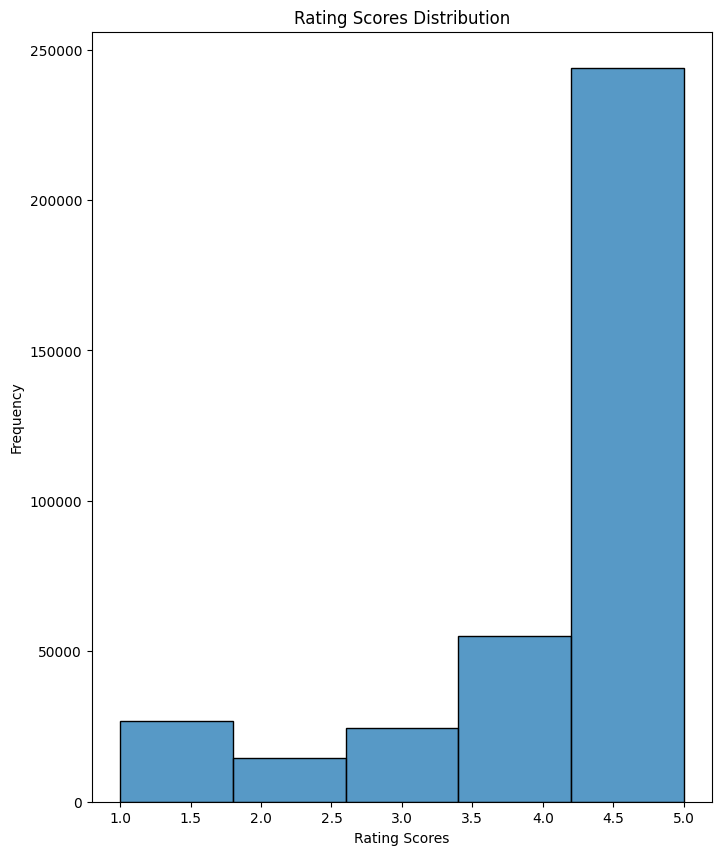

In [ ]:
# plot chart of distribution
sns.histplot(data=df, x='rating', bins=5)
plt.title("Rating Scores Distribution")
plt.xlabel("Rating Scores")
plt.ylabel("Frequency")

plt.show()

* **Result:** <br>
From rating scores distribution, We found that the most of data is rating = 5 and the least is rating = 2.




## Sentiment Distribution

In [ ]:
# count value of each sentiment
df['sentiment'].value_counts()

sentiment
positive    298903
negative     41469
neutral      24597
Name: count, dtype: int64

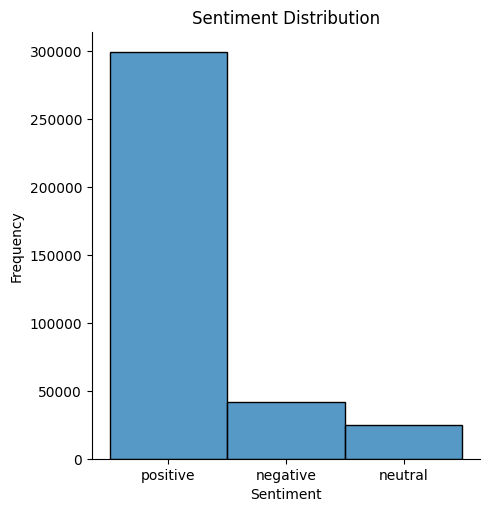

In [ ]:
# plot chart of distribution
sns.displot(data=df, x='sentiment')

plt.title("Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Frequency")

plt.show()

* **Result:** <br>
From sentiment distribution, We found that the most of data is positive group and the least is neutral group.

## Length of Text

In [ ]:
# calculate mean and average of number of character and number of word
# insert the values into new column of dataframe
agg_df = df.groupby('sentiment') \
        .agg(sum_char = ('count_char','sum'),
             avg_char = ('count_char','mean'),
             sum_word = ('count_word','sum'),
             avg_word = ('count_word','mean'),).reset_index()

agg_df

,sentiment,sum_char,avg_char,sum_word,avg_word
0,negative,8812489,212.507873,931446,22.461260
1,neutral,5181029,210.636622,551498,22.421352
2,positive,51109585,170.990539,5438788,18.195829


<ipython-input-65-fe6e3f2d9f63>:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2,2,1)


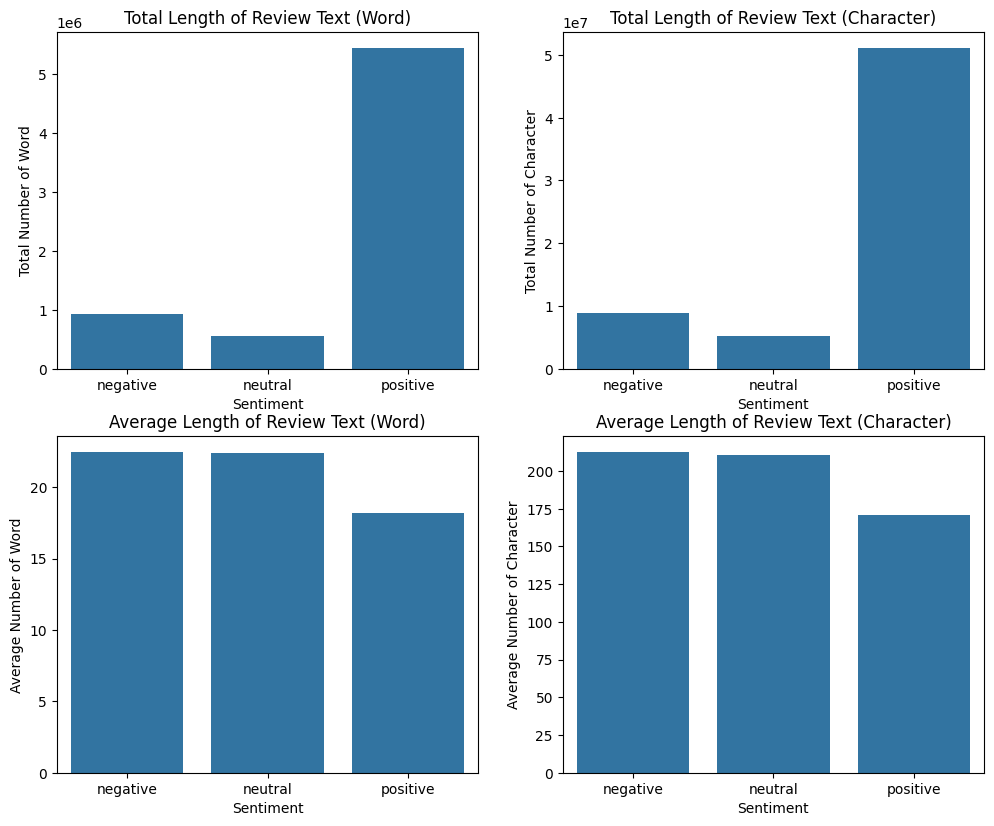

In [ ]:
# set suplot size
fig, ax = plt.subplots(figsize=(10, 8))
fig.tight_layout()

# observer total length of review text by counting word
plt.subplot(2,2,1)
sns.barplot(data=agg_df, x='sentiment', y='sum_word')
plt.title('Total Length of Review Text (Word)')
plt.ylabel('Total Number of Word')
plt.xlabel('Sentiment')

# observer total length of review text by counting character
plt.subplot(2,2,2)
sns.barplot(data=agg_df, x='sentiment', y='sum_char')
plt.title('Total Length of Review Text (Character)')
plt.ylabel('Total Number of Character')
plt.xlabel('Sentiment')

# observer average length of review text by counting word
plt.subplot(2,2,3)
sns.barplot(data=agg_df, x='sentiment', y='avg_word')
plt.title('Average Length of Review Text (Word)')
plt.ylabel('Average Number of Word')
plt.xlabel('Sentiment')

# observer average length of review text by counting character
plt.subplot(2,2,4)
sns.barplot(data=agg_df, x='sentiment', y='avg_char')
plt.title('Average Length of Review Text (Character)')
plt.ylabel('Average Number of Character')
plt.xlabel('Sentiment')

plt.show()

* **Result:**  <br>
It shows that positive group is the highest of total length both word and character. and neutral group is the lowest. <br>
For average length both word and character, negative group and neutral group are the highest and positive group is the lowest. I think that data consists of mostly positive group and least of negative group and neutral group.

## Word Frequency


In [ ]:
# observe top 10 word frequency of all data
freq_all.head(10)

great      90712
work       79541
product    69786
one        63805
good       63195
fit        58893
car        57436
use        56920
well       51558
would      44153
Name: count, dtype: int64

In [ ]:
# observe top 10 word frequency of each data
print(f'Top 10 Word Frequency of Negative\n{freq_neg.head(10)}\n')
print(f'Top 10 Word Frequency of Neutral\n{freq_neu.head(10)}\n')
print(f'Top 10 Word Frequency of Positive\n{freq_pos.head(10)}')

Top 10 Word Frequency of Negative
one        10284
fit         9595
product     9511
would       8412
work        7806
car         6426
get         5905
time        5765
use         5758
like        5063
Name: count, dtype: int64

Top 10 Word Frequency of Neutral
work       5866
one        5331
fit        4911
would      4767
good       4457
product    4188
get        4005
use        3751
well       3588
like       3526
Name: count, dtype: int64

Top 10 Word Frequency of Positive
great      85851
work       65869
product    56087
good       54492
one        48190
car        47492
use        47411
well       44551
fit        44387
easy       37973
Name: count, dtype: int64


In [ ]:
# create function for create dataframe of word frequency
def create_df_freq(data,sentiment) :
    df_freq = pd.DataFrame(data=data)
    df_freq.reset_index(inplace=True)
    df_freq.columns=[f'word_{sentiment}',f'freq_{sentiment}']
    return df_freq

# apply function to each data
df_f0 = create_df_freq(freq_all,'all')
df_f1 = create_df_freq(freq_neg,'negative')
df_f2 = create_df_freq(freq_neu,'neutral')
df_f3 = create_df_freq(freq_pos,'positive')

# concat
word_freq_df = pd.concat([df_f0, df_f1, df_f2, df_f3], axis=1)

# view data
word_freq_df.head(10)

,word_all,freq_all,word_negative,freq_negative,word_neutral,freq_neutral,word_positive,freq_positive
0,great,90712,one,10284.0,work,5866.0,great,85851.0
1,work,79541,fit,9595.0,one,5331.0,work,65869.0
2,product,69786,product,9511.0,fit,4911.0,product,56087.0
3,one,63805,would,8412.0,would,4767.0,good,54492.0
4,good,63195,work,7806.0,good,4457.0,one,48190.0
5,fit,58893,car,6426.0,product,4188.0,car,47492.0
6,car,57436,get,5905.0,get,4005.0,use,47411.0
7,use,56920,time,5765.0,use,3751.0,well,44551.0
8,well,51558,use,5758.0,well,3588.0,fit,44387.0
9,would,44153,like,5063.0,like,3526.0,easy,37973.0


### Word Cloud

In [ ]:
# extract value from list and keep it as string for input in word cloud

# all sentiment
separator = ', '
str_all = separator.join(un_all)

# negative
separator = ', '
str_neg = separator.join(un_neg)

# neutral
separator = ', '
str_neu = separator.join(un_neu)

#positive
separator = ', '
str_pos = separator.join(un_pos)

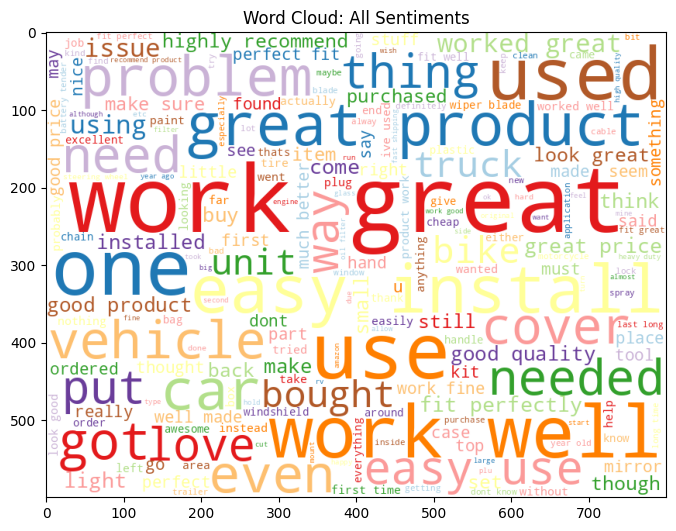

In [ ]:
# create word cloud of all sentiments
wc_all = WordCloud(width=800, height=600,
            background_color='white',
            colormap='Paired').generate(str_all)

# plot word cloud of all sentiment
plt.figure(figsize = (8, 8))
plt.title('Word Cloud: All Sentiments')
plt.imshow(wc_all)

plt.show()

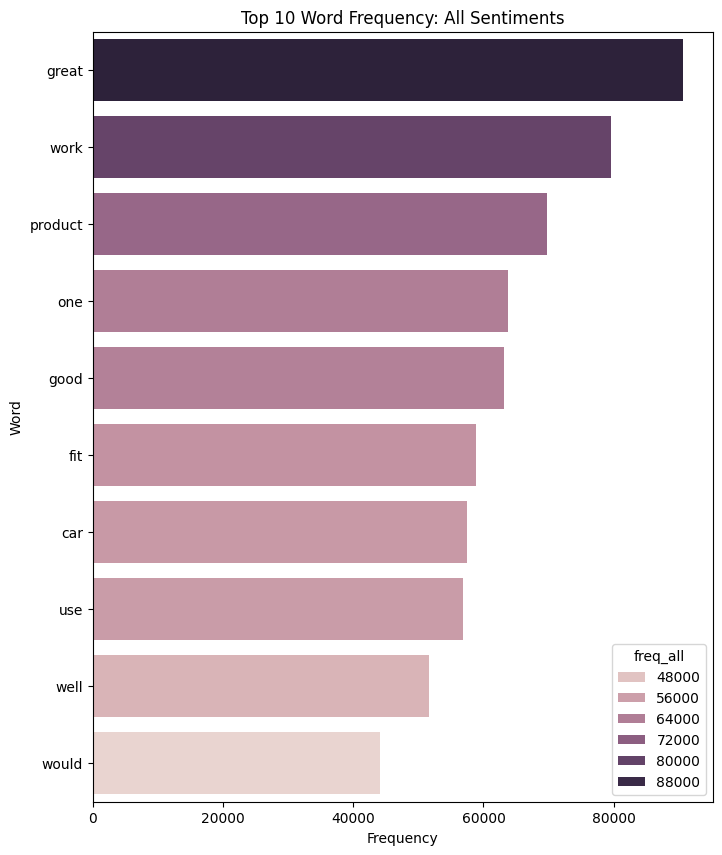

In [ ]:
# plot bar chart of all sentiment
p = sns.color_palette("flare")
sns.set_palette(p)
sns.barplot(word_freq_df.head(10), x='freq_all', y='word_all', hue='freq_all')

plt.title('Top 10 Word Frequency: All Sentiments')
plt.xlabel('Frequency')
plt.ylabel('Word')
plt.show()

<ipython-input-72-ae1ea1b7e42a>:19: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax = plt.subplot(3,1,1)


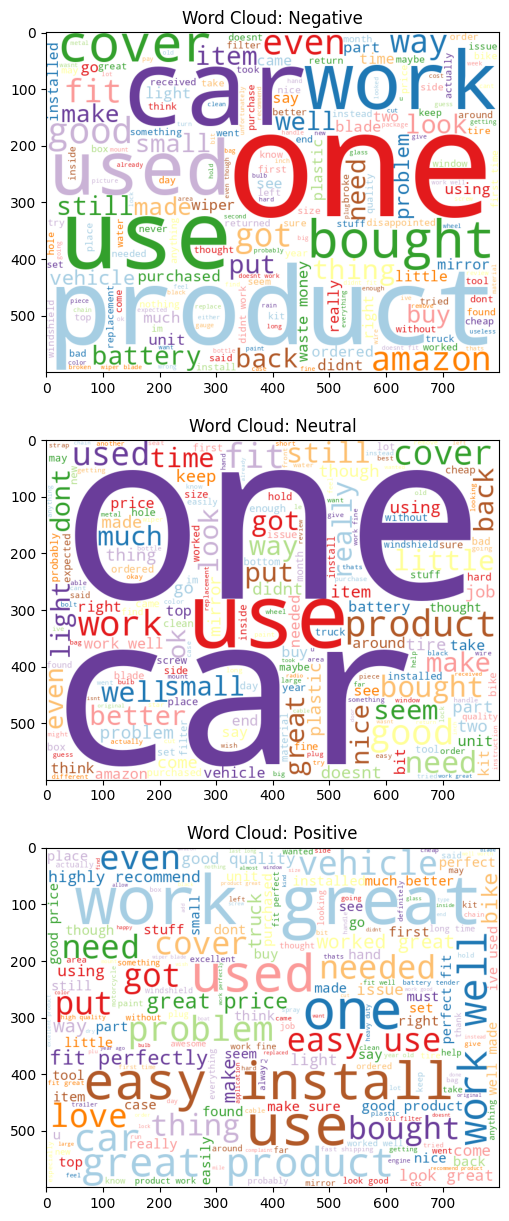

In [ ]:
# create word cloud of reivew text in each sentiments
wc_neg = WordCloud(width=800, height=600,
            background_color='white',
            colormap='Paired_r').generate(str_neg)

wc_neu = WordCloud(width=800, height=600,
            background_color='white',
            colormap='Paired_r').generate(str_neu)

wc_pos = WordCloud(width=800, height=600,
            background_color='white',
            colormap='Paired_r').generate(str_pos)

# set subplot size
plt.subplots(figsize=(15,15))

# plot word cloud of each sentiment
# negative
ax = plt.subplot(3,1,1)
ax.set_title('Word Cloud: Negative')
plt.imshow(wc_neg)

# nuetral
ax = plt.subplot(3,1,2)
ax.set_title('Word Cloud: Neutral')
plt.imshow(wc_neu)

# positive
ax = plt.subplot(3,1,3)
ax.set_title('Word Cloud: Positive')
plt.imshow(wc_pos)

plt.show()

<ipython-input-73-53e84be4485e>:8: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax = plt.subplot(3,1,1)


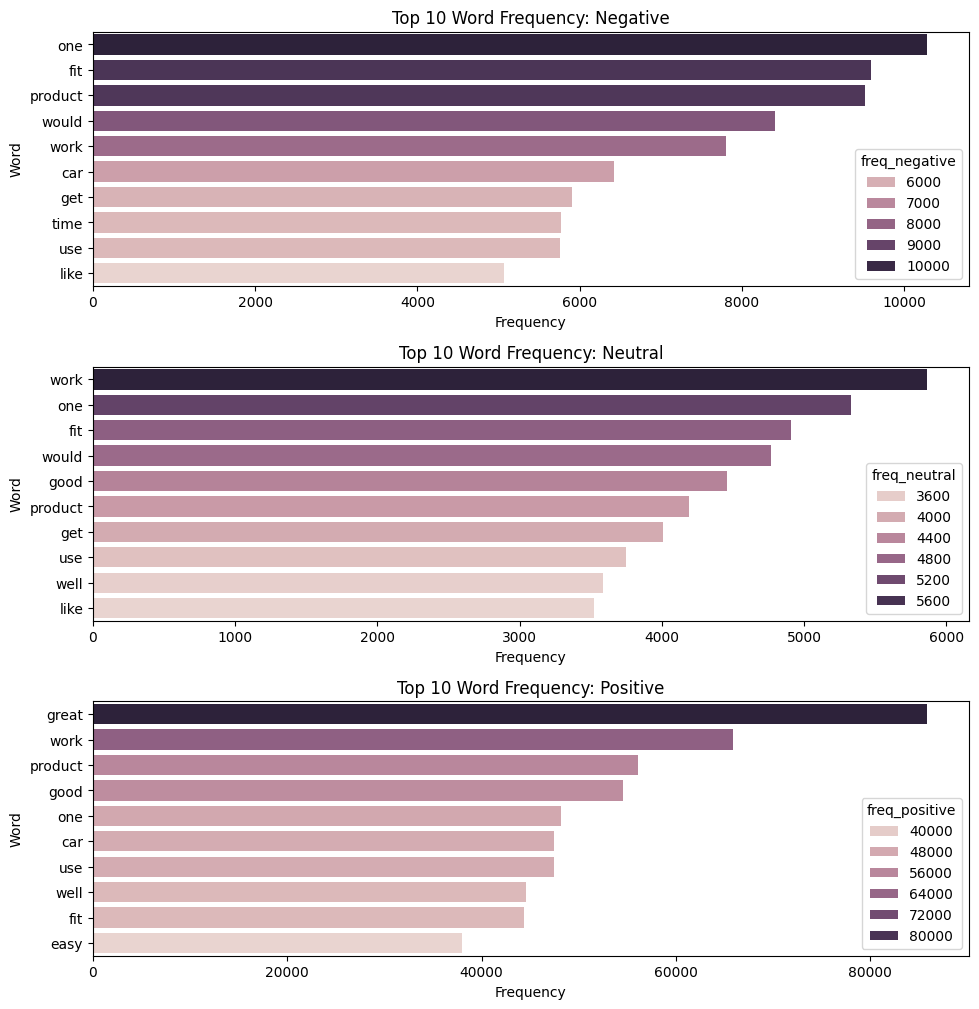

In [ ]:
# set subplot size
plt.subplots(figsize=(10, 10))
p = sns.color_palette("flare")
sns.set_palette(p)

# plot bar chart of each sentiment
# negative
ax = plt.subplot(3,1,1)
plt.tight_layout()
sns.barplot(word_freq_df.head(10), x='freq_negative', y='word_negative', hue='freq_negative')
plt.title('Top 10 Word Frequency: Negative')
plt.xlabel('Frequency')
plt.ylabel('Word')

# neutral
ax = plt.subplot(3,1,2)
plt.tight_layout()
sns.barplot(word_freq_df.head(10), x='freq_neutral', y='word_neutral', hue='freq_neutral')
plt.title('Top 10 Word Frequency: Neutral')
plt.xlabel('Frequency')
plt.ylabel('Word')

# positive
ax = plt.subplot(3,1,3)
plt.tight_layout()
sns.barplot(word_freq_df.head(10), x='freq_positive', y='word_positive', hue='freq_positive')
plt.title('Top 10 Word Frequency: Positive')
plt.xlabel('Frequency')
plt.ylabel('Word')

plt.show()



*   **Result:** <br>
As the chart, we will conclude top 5 most common words as below: <br>
Positive group:  great, work, product, good, and one <br>
Neutral group:  work, one, fit, would, and good <br>
Negative group:  one, fit, product, would, and work





## N-grams

In this section we will analyze bigrams (2-word phrases) and trigrams (3-word phrases) to more understand frequently used word combination.

### Bigrams (2-Word Phrases)

Top 10 Bigrams of Negative
0        ((waste, money), 1369)
1          ((didnt, work), 812)
2          ((first, time), 737)
3         ((wiper, blade), 704)
4     ((would, recommend), 702)
5           ((would, fit), 688)
6           ((didnt, fit), 608)
7           ((look, like), 607)
8         ((doesnt, work), 561)
9         ((even, though), 556)
10          ((work, well), 552)
11         ((doesnt, fit), 547)
12         ((dont, waste), 531)
13            ((fit, car), 513)
14           ((dont, buy), 477)
15          ((dont, know), 467)
16       ((poor, quality), 429)
17         ((said, would), 424)
18     ((steering, wheel), 410)
19         ((waste, time), 372)
dtype: object



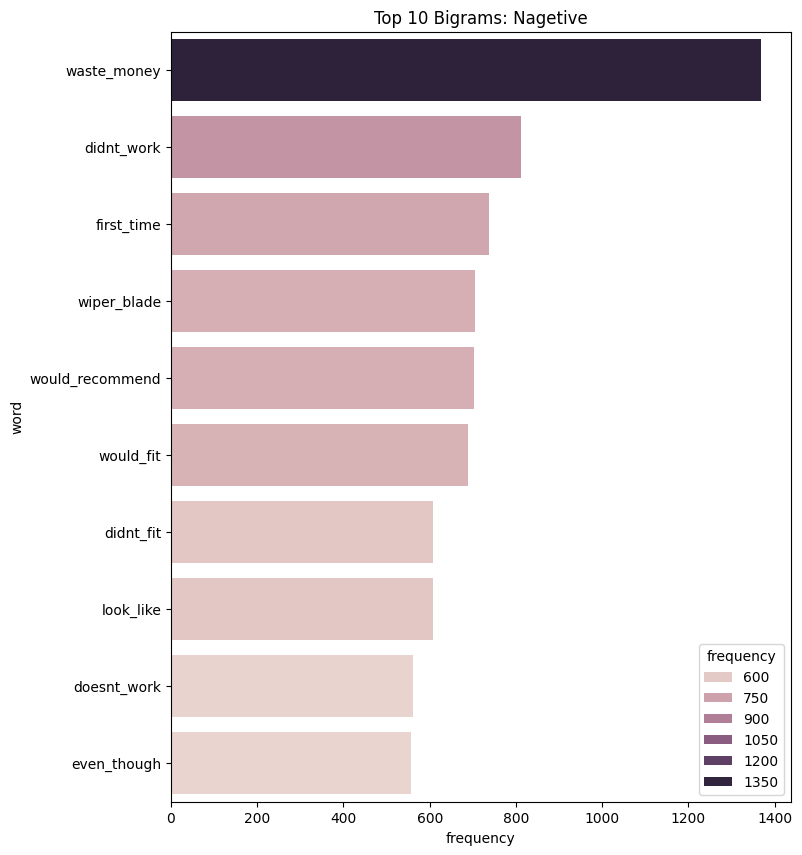

In [ ]:
# bigrams of negtive
neg_bi = FreqDist(nltk.bigrams(un_neg))
neg_bi = neg_bi.most_common(20)
print(f'Top 10 Bigrams of Negative\n{pd.Series(neg_bi)}\n')

# plot bar chart
wrds = ['_'.join(x) for x, c in list(neg_bi)]
wdth = [int(c) for x, c in list(neg_bi)]
df_bar = pd.DataFrame({'word':wrds, 'frequency':wdth})

sns.barplot(data=df_bar.head(10), x='frequency', y='word', orient='y',hue='frequency')
plt.title('Top 10 Bigrams: Nagetive')
plt.show()

Top 10 Bigrams of Neutral
0           ((work, well), 750)
1           ((work, fine), 456)
2          ((work, great), 390)
3             ((im, sure), 330)
4           ((look, like), 329)
5           ((make, sure), 310)
6        ((good, product), 300)
7           ((dont, know), 292)
8      ((steering, wheel), 291)
9           ((last, long), 281)
10      ((thought, would), 264)
11            ((work, ok), 256)
12        ((much, better), 256)
13       ((easy, install), 244)
14        ((wiper, blade), 238)
15       ((good, quality), 238)
16          ((look, good), 237)
17           ((fit, well), 236)
18    ((would, recommend), 230)
19         ((doesnt, fit), 229)
dtype: object



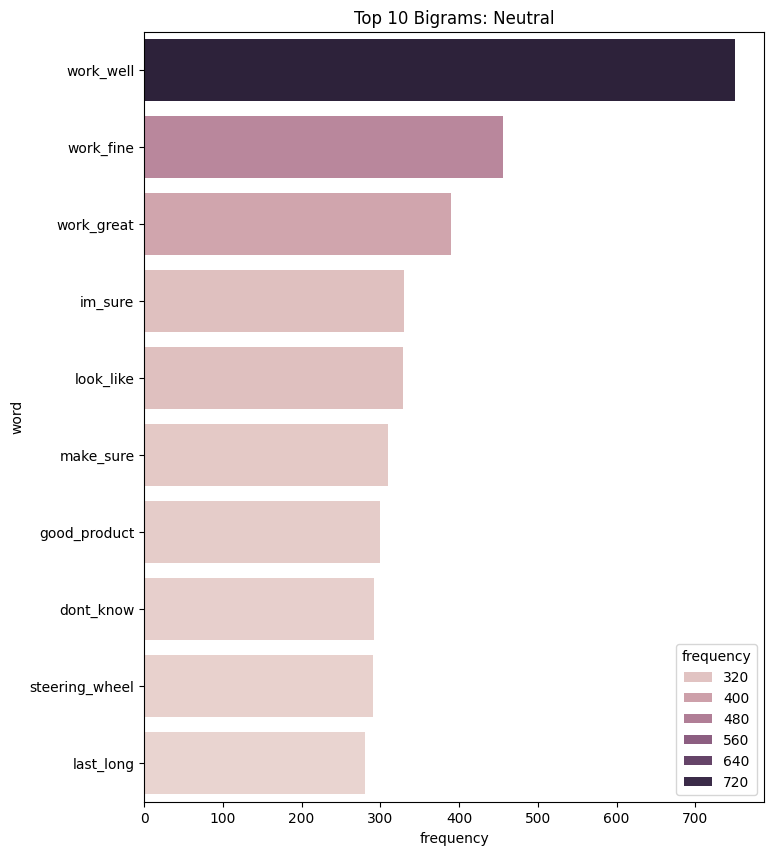

In [ ]:
# bigrams of neutral
neu_bi = FreqDist(nltk.bigrams(un_neu))
neu_bi = neu_bi.most_common(20)
print(f'Top 10 Bigrams of Neutral\n{pd.Series(neu_bi)}\n')

# plot bar chart
wrds = ['_'.join(x) for x, c in list(neu_bi)]
wdth = [int(c) for x, c in list(neu_bi)]
df_bar = pd.DataFrame({'word':wrds, 'frequency':wdth})

sns.barplot(data=df_bar.head(10), y='word', x='frequency' ,orient='y', hue='frequency')
plt.title('Top 10 Bigrams: Neutral')
plt.show()

Top 10 Bigrams of Positive
0          ((work, great), 17931)
1         ((easy, install), 9859)
2        ((great, product), 9804)
3            ((work, well), 9581)
4             ((easy, use), 6112)
5          ((great, price), 5144)
6        ((fit, perfectly), 5044)
7         ((worked, great), 5015)
8     ((highly, recommend), 4754)
9      ((would, recommend), 4750)
10        ((good, quality), 4658)
11          ((look, great), 4536)
12        ((good, product), 4468)
13         ((perfect, fit), 4218)
14           ((well, made), 3898)
15          ((good, price), 3795)
16           ((make, sure), 3709)
17         ((much, better), 3201)
18           ((look, like), 3168)
19            ((ive, used), 2893)
dtype: object



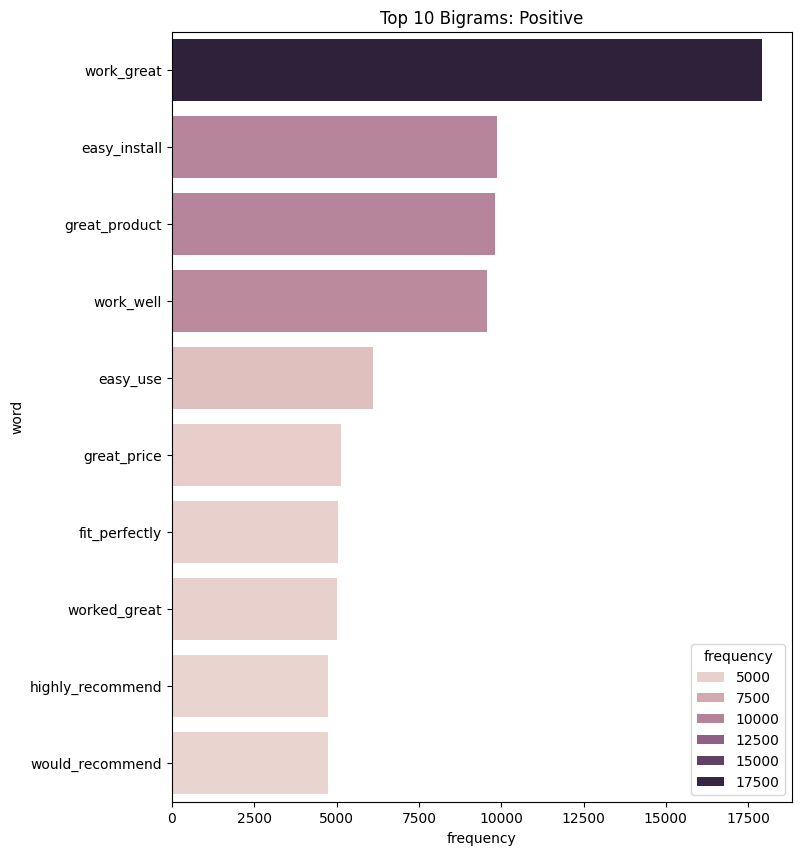

In [ ]:
# bigrams of positive
pos_bi = FreqDist(nltk.bigrams(un_pos))
pos_bi = pos_bi.most_common(20)
print(f'Top 10 Bigrams of Positive\n{pd.Series(pos_bi)}\n')

# plot bar chart
wrds = ['_'.join(x) for x, c in list(pos_bi)]
wdth = [int(c) for x, c in list(pos_bi)]
df_bar = pd.DataFrame({'word':wrds, 'frequency':wdth})

sns.barplot(data=df_bar.head(10), y='word', x='frequency', orient='y', hue='frequency')
plt.title('Top 10 Bigrams: Positive')
plt.show()

*   **Result:** <br>
As the chart, we will conclude top 3 most common bigrams words as below: <br>
Positive group:  work-great, easy-install, and great-product <br>
Neutral group:  work-well, work-fine, and work-great <br>
Negetive group:  waste-money, didnt-work, and first-time


### Trigrams (3-Word Phrases)

Top 10 Trigrams of Negative
dont_waste_money           412
said_would_fit             212
waste_time_money           191
first_time_used            181
auto_part_store            154
would_recommend_product    122
total_waste_money           94
dont_waste_time             94
broke_first_time            90
local_auto_part             85
dtype: int64



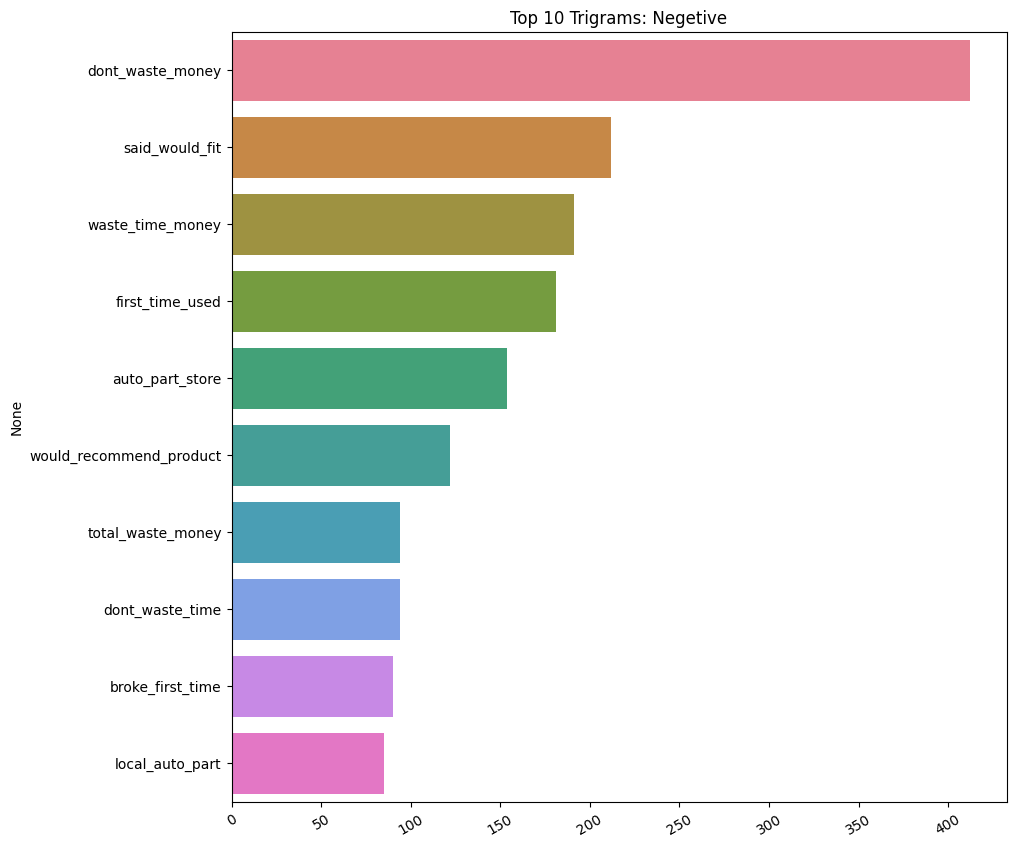

In [ ]:
# trigrams of negtive

# create trigram
trigrams = list(nltk.trigrams(un_neg))
trigram_tokens = ['{}_{}_{}'.format(a, b,c) for a, b, c in trigrams]

# create FreqDist
all_fdist = FreqDist(trigram_tokens).most_common(10)

all_fdist = pd.Series(dict(all_fdist))
print(f'Top 10 Trigrams of Negative\n{pd.Series(all_fdist)}\n')

# plot chart
fig, ax = plt.subplots(figsize=(10,10))
all_plot = sns.barplot(x=all_fdist.values, y=all_fdist.index, hue=all_fdist.index, ax=ax, legend=False, orient='y')
plt.title('Top 10 Trigrams: Negetive')
plt.xticks(rotation=30)
plt.show()

Top 10 Trigrams of Neutral
get_job_done            128
auto_part_store          65
said_would_fit           49
got_job_done             49
doesnt_last_long         48
steering_wheel_cover     42
work_well_enough         40
first_time_used          39
dont_last_long           39
havent_used_yet          34
dtype: int64



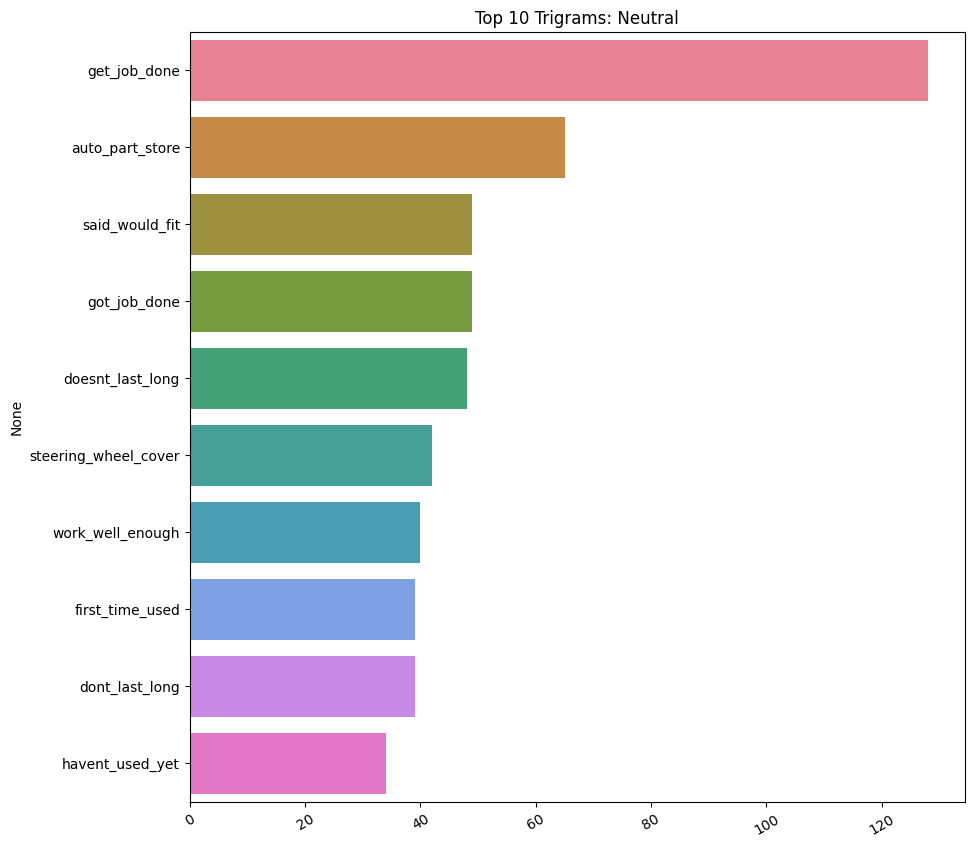

In [ ]:
# trigrams of neutral

# create trigram
trigrams = list(nltk.trigrams(un_neu))
trigram_tokens = ['{}_{}_{}'.format(a, b,c) for a, b, c in trigrams]

# create FreqDist
all_fdist = FreqDist(trigram_tokens).most_common(10)

all_fdist = pd.Series(dict(all_fdist))
print(f'Top 10 Trigrams of Neutral\n{pd.Series(all_fdist)}\n')

# plot chart
fig, ax = plt.subplots(figsize=(10,10))
all_plot = sns.barplot(x=all_fdist.values, y=all_fdist.index, hue=all_fdist.index, ax=ax, legend=False, orient='y')
plt.title('Top 10 Trigrams: Neutral')
plt.xticks(rotation=30)
plt.show()

Top 10 Trigrams of Positive
auto_part_store             1098
last_long_time              1084
would_highly_recommend       942
would_recommend_anyone       893
get_job_done                 892
cant_go_wrong                826
easy_install_work            766
highly_recommend_product     736
great_product_great          728
work_like_charm              707
dtype: int64



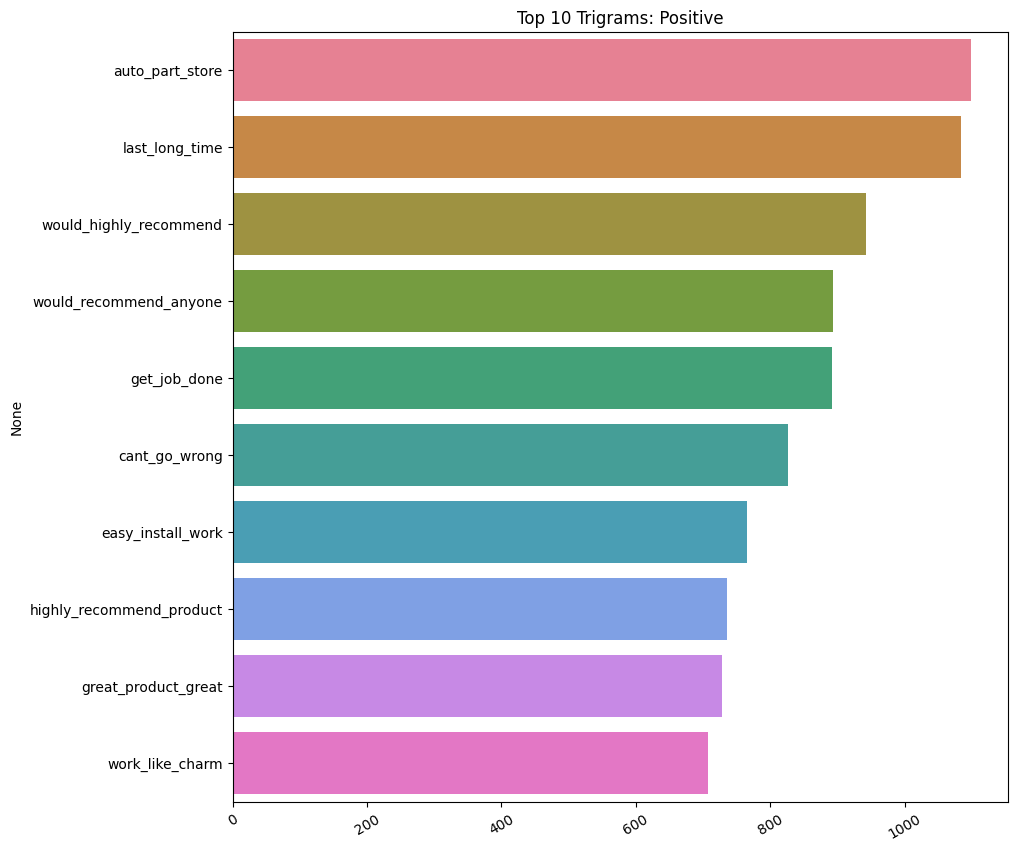

In [ ]:
# trigrams of positive

# create trigram
trigrams = list(nltk.trigrams(un_pos))
trigram_tokens = ['{}_{}_{}'.format(a, b,c) for a, b, c in trigrams]

# create FreqDist
all_fdist = FreqDist(trigram_tokens).most_common(10)

all_fdist = pd.Series(dict(all_fdist))
print(f'Top 10 Trigrams of Positive\n{pd.Series(all_fdist)}\n')

# plot chart
fig, ax = plt.subplots(figsize=(10,10))
all_plot = sns.barplot(x=all_fdist.values, y=all_fdist.index, hue=all_fdist.index, ax=ax, legend=False, orient='y')
plt.title('Top 10 Trigrams: Positive')
plt.xticks(rotation=30)
plt.show()

*   **Result:** <br>
As the chart, we will conclude top 3 most common trigrams words as below: <br>
Positive group:  auto-part-store, last_long_time, and would-highly-recommend <br>
Neutral group:  get-job-done, auto-art-store, said_would_fit, and got_job_done   <br>
Negetive group:  dont-waste-money, said-would-fit, and waste_time_money

## EDA Question1:  Explore topic of each sentiment

**Negative Sentiment**

In [ ]:
# convert text to vector
v_neg = df[df['sentiment'] == 'negative']['reviewText'].apply(lambda x: ' '.join(x))

vect = TfidfVectorizer(max_features=1000)
vect_neg_text = vect.fit_transform(v_neg)

# show results
print(vect_neg_text.shape)
print(vect_neg_text)

(41469, 1000)
  (0, 959)	0.19012874479967876
  (0, 323)	0.33112200818751647
  (0, 481)	0.20443892392285554
  (0, 9)	0.2530721061456401
  (0, 642)	0.14688281914793516
  (0, 55)	0.2256176719240736
  (0, 203)	0.30481758374042733
  (0, 403)	0.26541479490069986
  (0, 701)	0.2715205278108649
  (0, 404)	0.20780556192355645
  (0, 834)	0.31043561400486297
  (0, 813)	0.21271067870258512
  (0, 216)	0.1769031012221084
  (0, 568)	0.14289809131060507
  (0, 333)	0.1651453677437183
  (0, 699)	0.19796812474838343
  (0, 870)	0.27111747069493375
  (0, 885)	0.2496508862564784
  (1, 444)	0.155427749254874
  (1, 201)	0.11713795340029207
  (1, 302)	0.1917325639676061
  (1, 160)	0.15215767977960928
  (1, 654)	0.1232583619918315
  (1, 483)	0.1454426020526512
  (1, 295)	0.13746590525527463
  :	:
  (41467, 706)	0.19516564860167623
  (41467, 173)	0.27579932692171494
  (41467, 54)	0.1682924080473284
  (41467, 380)	0.21272533116536274
  (41467, 678)	0.1932631795524665
  (41467, 920)	0.1501286616217544
  (41467, 524

In [ ]:
# do topic modeling by LDA
seed = 42

lda_model = LatentDirichletAllocation(n_components=5, learning_method='online', random_state=seed, max_iter=1)
lda_neg = lda_model.fit_transform(vect_neg_text)

# show results as format: (no_of_doc,no_of_topics)
print(lda_neg.shape)
print(lda_neg)

(41469, 5)
[[0.23725112 0.03946811 0.03913359 0.03988549 0.64426169]
 [0.03364371 0.03330009 0.0336214  0.43713904 0.46229577]
 [0.05247115 0.04852071 0.0485031  0.04892256 0.80158248]
 ...
 [0.04028005 0.04043218 0.13195511 0.04068911 0.74664356]
 [0.03933716 0.03905605 0.04101054 0.11349529 0.76710096]
 [0.04732849 0.16099604 0.11695288 0.04616134 0.62856124]]


In [ ]:
# view the most important words for each topic
vocab = vect.get_feature_names_out()

for i, comp in enumerate(lda_model.components_):
    vocab_comp = zip(vocab, comp)
    sorted_words = sorted(vocab_comp, key= lambda x:x[1], reverse=True)[:20]
    print("Topic "+str(i)+": ")
    for t in sorted_words:
        print(t[0],end=" ")
    print("\n")

Topic 0: 
work didnt fit waste money broken doesnt month apart dont junk wrong fell pump one sent buy time week ripped 

Topic 1: 
broke cheap plastic strap use first bag flimsy expected glass hold instruction made holder tube cup followed came window thin 

Topic 2: 
fit fuse returned poor working terrible advertised said quality jeep stated stopped wire bar heat low gauge product correct fitting 

Topic 3: 
fit tire cover would bike size look small kit one wheel like mirror way work side car product tool make 

Topic 4: 
one product battery would time good get work bought year use buy car bulb month dont like light used return 




**Possible Topic Name of Negative Sentiment:**
<br>

- **Topic 0:  Broken and Defective** <br>
Keywords: broken, waste money, broken, doesn't fit, wrong<br>

- **Topic 1:  Poor Quality and Design** <br>
Keywords: cheap, plastic, broke, flimsy, expected<br>

- **Topic 2:  Incompatibility** <br>
Keywords: fit, fuse, returned, poor, working, terrible<br>

- **Topic 3:  Sizing Issues** <br>
Keywords: fit, tire cover, size, small, work, side<br>

- **Topic 4:  Short Lifespan and Dissatisfaction** <br>
Keywords: one, battery, year, work, month, don't like, return<br>

**Neutral Sentiment**

In [ ]:
# convert text to vector
v_neu = df[df['sentiment'] == 'neutral']['reviewText'].apply(lambda x: ' '.join(x))

vect = TfidfVectorizer(max_features=1000)
vect_neu_text = vect.fit_transform(v_neu)

# show results
print(vect_neu_text.shape)
print(vect_neu_text)

(24597, 1000)
  (0, 850)	0.3735947208137434
  (0, 225)	0.2977384468562752
  (0, 439)	0.23049194568325854
  (0, 340)	0.17811411506717997
  (0, 70)	0.29159136584026996
  (0, 531)	0.3265339544045546
  (0, 63)	0.28635572142417925
  (0, 504)	0.2305787450750945
  (0, 927)	0.18165742899063272
  (0, 728)	0.3609611474899447
  (0, 116)	0.1946867073302612
  (0, 441)	0.24299981441623986
  (0, 852)	0.23163038051952448
  (0, 506)	0.21497602993466097
  (1, 352)	0.3495142526181786
  (1, 638)	0.6549352963330696
  (1, 858)	0.5332033261581345
  (1, 116)	0.40570156249116457
  (2, 984)	0.15295413672614097
  (2, 647)	0.2663911509577843
  (2, 177)	0.35651612688759365
  (2, 492)	0.2144956393059283
  (2, 842)	0.290456601888257
  (2, 52)	0.30317436005020465
  (2, 349)	0.24033542372357852
  :	:
  (24596, 16)	0.08572669133708458
  (24596, 470)	0.18681166895095425
  (24596, 640)	0.18984548322105826
  (24596, 53)	0.20008648841684676
  (24596, 881)	0.07780885868918401
  (24596, 553)	0.06331928343740327
  (24596, 212

In [ ]:
# do topic modeling by LDA
lda_model = LatentDirichletAllocation(n_components=5, learning_method='online', random_state=seed, max_iter=1)
lda_neu = lda_model.fit_transform(vect_neu_text)

# show results as format: (no_of_doc,no_of_topics)
print(lda_neu.shape)
print(lda_neu)

(24597, 5)
[[0.82477259 0.04353669 0.04385507 0.0443951  0.04344055]
 [0.71992596 0.06984877 0.07031822 0.06955759 0.07034946]
 [0.04889606 0.37892011 0.4723288  0.05059003 0.049265  ]
 ...
 [0.07226345 0.06044022 0.62308585 0.16921223 0.07499825]
 [0.04864947 0.59462063 0.25877581 0.04908614 0.04886796]
 [0.08705419 0.03106895 0.75277765 0.09996288 0.02913632]]


In [ ]:
# view the most important words for each topic
vocab = vect.get_feature_names_out()

for i, comp in enumerate(lda_model.components_):
    vocab_comp = zip(vocab, comp)
    sorted_words = sorted(vocab_comp, key= lambda x:x[1], reverse=True)[:20]
    print("Topic "+str(i)+": ")
    for t in sorted_words:
        print(t[0],end=" ")
    print("\n")

Topic 0: 
battery fuse wire ac work glove made jacket long worked last arrived job need paint jeep get good product bit 

Topic 1: 
smell month wear hose handle flimsy year lasted pump work cool like last open sun fine cold seal door expecting 

Topic 2: 
fit one would work get well size car product use like cover good make back look time side need bike 

Topic 3: 
expected leak work better use much filter good product havent dont oil really okay yet used bulb buy money bottle 

Topic 4: 
ok good work fit price tire well cheap light bulb great small chain bright little product quality cover job brighter 



**Possible Topic Name of Neutral Sentiment:**
<br>


- **Topic 0: Functionality and Basic Use**<br>
Keywords: work, battery, fuse, wire, job

- **Topic 1: Durability and Performance** <br>
Keywords: work, wear, last, month, year

- **Topic 2: Compatibility** <br>
Keywords: fit, one, work, size, car, product

- **Topic 3: Effectiveness** <br>
Keywords: work, use, good, product, haven't

- **Topic 4: Satisfactory Purchase** <br>
Keywords: good, work, fit, price, light

**Positive Sentiment**

In [ ]:
# convert text to vector
v_pos = df[df['sentiment'] == 'positive']['reviewText'].apply(lambda x: ' '.join(x))

vect = TfidfVectorizer(max_features=1000)
vect_pos_text = vect.fit_transform(v_pos)

# show results
print(vect_pos_text.shape)
print(vect_pos_text)

(298903, 1000)
  (0, 448)	0.4149388960878011
  (0, 392)	0.3180556844629748
  (0, 640)	0.3491474989259486
  (0, 852)	0.29831666050917277
  (0, 415)	0.29160432238841505
  (0, 750)	0.4036318177027926
  (0, 483)	0.2629114121109889
  (0, 479)	0.2213723085296098
  (0, 987)	0.23155194676229443
  (0, 300)	0.3099570121833618
  (1, 131)	0.35474635093820867
  (1, 690)	0.2135118974344306
  (1, 815)	0.33349099549198563
  (1, 429)	0.25390997436832424
  (1, 600)	0.3410041457321712
  (1, 422)	0.32727107392911253
  (1, 560)	0.3143239510551378
  (1, 625)	0.2692572901736498
  (1, 823)	0.298233987318632
  (1, 772)	0.28366525467325465
  (1, 720)	0.23728729312909053
  (1, 479)	0.18021434974735062
  (2, 960)	0.13578882402265408
  (2, 369)	0.20864163946906925
  (2, 410)	0.2587740549108074
  :	:
  (298902, 316)	0.16641934227236385
  (298902, 221)	0.1598447793831259
  (298902, 686)	0.14291870518791963
  (298902, 267)	0.12696550520363134
  (298902, 32)	0.14532799277195593
  (298902, 808)	0.17843298507436695
  (2

In [ ]:
# do topic modeling by LDA
lda_model = LatentDirichletAllocation(n_components=5, learning_method='online', random_state=seed, max_iter=1)
lda_pos = lda_model.fit_transform(vect_pos_text)

# show results as format: (no_of_doc,no_of_topics)
print(lda_pos.shape)
print(lda_pos)

(298903, 5)
[[0.6898778  0.04885823 0.04923488 0.16288094 0.04914815]
 [0.16102907 0.0453833  0.04561821 0.04546188 0.70250753]
 [0.32142064 0.04274576 0.0436094  0.04286664 0.54935758]
 ...
 [0.72749956 0.04185777 0.11777921 0.07068171 0.04218175]
 [0.79491322 0.0291076  0.0294668  0.11675294 0.02975945]
 [0.69618907 0.09465716 0.03504097 0.13991198 0.03420082]]


In [ ]:
# view the most important words for each topic
vocab = vect.get_feature_names_out()

for i, comp in enumerate(lda_model.components_):
    vocab_comp = zip(vocab, comp)
    sorted_words = sorted(vocab_comp, key= lambda x:x[1], reverse=True)[:20]
    print("Topic "+str(i)+": ")
    for t in sorted_words:
        print(t[0],end=" ")
    print("\n")

Topic 0: 
one great use work car get well easy battery used would little best time like product good need year make 

Topic 1: 
great good price product quality easy fast install exactly awesome work shipping described needed delivery buy quick use bolt super 

Topic 2: 
fit nice perfectly excellent look great work well advertised love item product filter recommend good made jeep happy order loved 

Topic 3: 
bike tire issue money job arrived yet motorcycle chain well good working fit great wheel value cover havent work several 

Topic 4: 
perfect fit worked great like thanks ordered boat love gift wanted look husband thank wire jack color stuff hand another 



**Possible Topic Name of Positive Sentiment:**
<br>

- **Topic 0: Easy Use and Functionality** <br>
Keywords: work, easy, car, battery, use

- **Topic 1: Excellent Value and Fast Delivery** <br>
Keywords: great, price, product, fast, easy, install

- **Topic 2: Perfect Fit and Enhanced Appearance** <br>
Keywords: fit, great, work, well, love

- **Topic 3: Resolved Issue and Improved Performance** <br>
Keywords: work, fit, great, motorcycle, chain

- **Topic 4: Perfect Gift and Easy Installation**<br>
Keywords: perfect, fit, worked, boat, love

## EDA Question2:  Explore strength and weakness of product


**Visualize Distribution of Entity**

In [ ]:
# transform data for creating chart
entity_value = entity_encode.apply(pd.value_counts).T.sort_values(1, ascending=False)
entity_value = entity_value.head(10).T
entity_value = entity_value.loc[1]
entity_value

size                     184514
style                    106804
color                     97155
package_type              18963
package_quantity          11651
item_package_quantity     10611
format                     6314
size_name                  4019
style_name                 3965
number_of_items            3128
Name: 1, dtype: int64

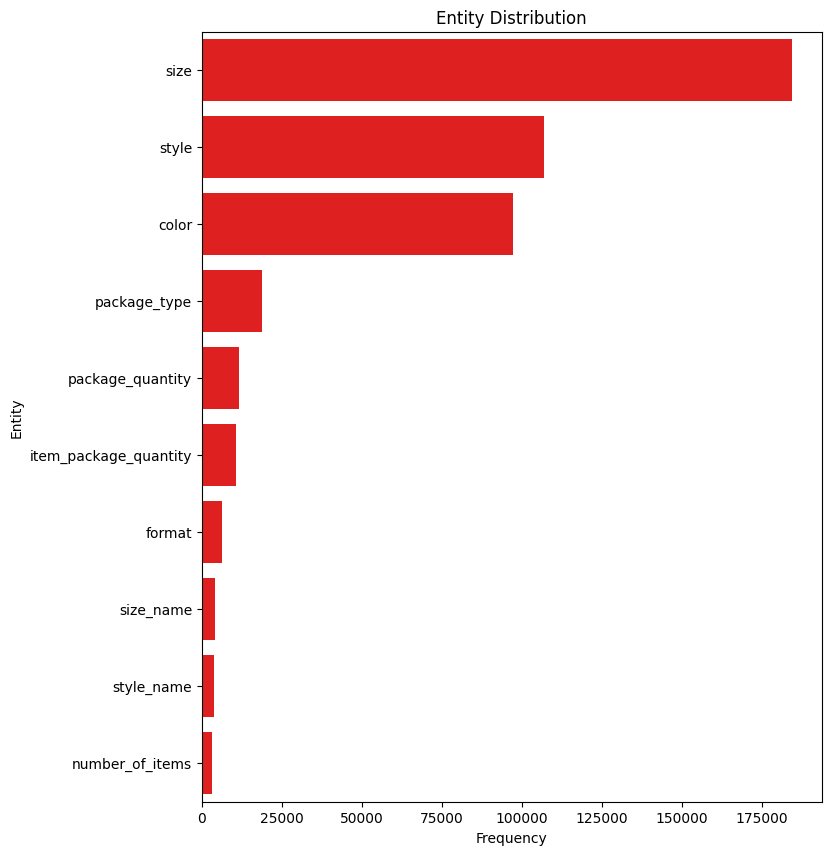

In [ ]:
# plot chart of distribution
sns.barplot(data=entity_value, orient="y", color="r")
plt.title("Entity Distribution")
plt.ylabel("Entity")
plt.xlabel("Frequency")


plt.show()

**Visualize Distribution of Dimension**

In [ ]:
# transform data for creating chart
dim_value = dim.apply(pd.value_counts).T.sort_values(1, ascending=False)
dim_value = dim_value.T.loc[1]
dim_value

appearance      197248
property        191185
core_product      2583
Name: 1, dtype: int64

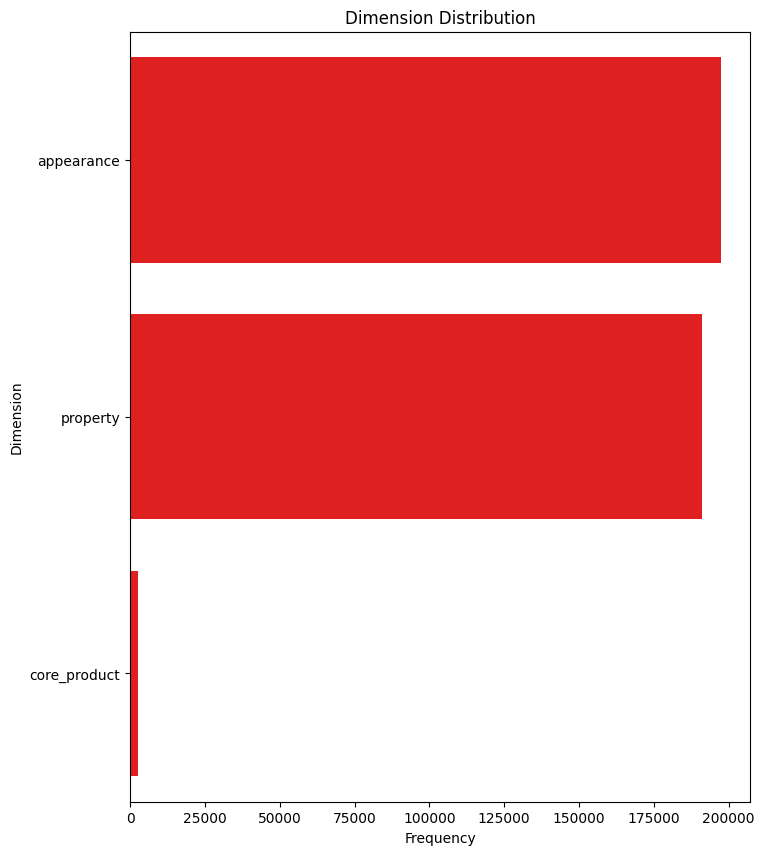

In [ ]:
# plot chart of distribution
sns.barplot(data=dim_value, orient="y", color="r")
plt.title("Dimension Distribution")
plt.ylabel("Dimension")
plt.xlabel("Frequency")

plt.show()

**Merge Dataframe**

In [ ]:
# merge dataframe
dim = dim.reset_index()
df = df.reset_index()

df = df.merge(dim, left_on='index', right_on='index')

# show new dataframe
df.drop(columns=['index'], inplace=True)

df

,rating,entity,reviewText,count_char,count_word,sentiment,property,appearance,core_product
0,4,{'Color:': ' CA'},"[fine, would, like, sticker, little, secure, im, sure, trust, gluing, power, moment, hold, key]",123,14,positive,0,1,0
1,2,{'Color:': ' T'},"[took, three, return, get, one, didnt, wobble, still, super, stable, whatever, im, tired, returning, ill, deal, bad, product, actually, look, function, well]",201,22,negative,0,1,0
2,2,{'Color:': ' AC'},"[product, fine, description, picture, wrong, describing, headline, state, bamboo, show, light, colored, wood, bought, match, piece, got, much, darker, box, checked, black, v, white, box, state, material, plywood, basswoodwaunut, packing, slip, probably, give, away, friend, try, find, im, looking, elsewhere, purchased, confirmed, checked, box, pattern, light, color, five, day, later]",485,50,negative,0,1,0
3,5,{'Color:': ' T'},"[beautiful, blend, right, wooden, desk, like, simple, elegant, stay, place, desk, nicely, included, pad, installed, phone, stand, really, charging, phone]",194,20,positive,0,1,0
4,5,{'Color:': ' T'},"[basic, stand, bought, one, desk, work, one, end, table, bed, inexpensive, thing, need, hold, phone, charging, turn, landscape, bought, one, husband, happy, well]",208,23,positive,0,1,0
...,...,...,...,...,...,...,...,...,...
364964,5,{'Size:': ' 1 Pack'},"[good, easy, understand, instruction, pressure, gauge, recommended, fill, level, easy, low, pressure, attachment, super, effective, reusable, trigger, bad, none, ended, buying, kit, amazon, since, cheaper, local, auto, part, shop, focus, without, ac, summer, dreading, idea, paying, mechanic, recharge, system, finally, bit, bullet, bought, kit, looked, low, pressure, valve, reference, accessed, front, wheel, well, cover, passenger, side, instruction, extremely, easy, follow, freon, efficient, cooling, air, output, temperature, wouldnt, drop, degree, f, recharging, one, put, degree, f, gauge, make, easy, prevent, overfilling, awesome, product, recommended, absolutely]",842,84,positive,1,0,0
364965,1,{'Size:': ' 1 Pack'},"[product, good, review, triggerhose, broke, changed, bottle, second, bottle, blew, across, front, yard, obviously, wasnt, able, use]",166,17,negative,1,0,0
364966,5,{'Size:': ' 1 Pack'},"[purchased, refrigerant, kit, refrigerant, sealant, want, find, leak, ac, system, coming, infiniti, gt, compressor, work, fine, system, always, lose, refrigerant, stop, blowing, cold, kit, refrigerant, sealant, dye, uv, light, see, dye, leak, week, since, application, ac, still, isnt, leaking, ive, read, story, people, going, year, without, repair, thanks, ac, sealant, took, grain, salt, already, surpassed, expectation, soon, system, leak, plan, update, review, time, system, work, flawlessly, buying, amazon, saved, buying, advance, auto, part, work, else, say, followup, forthcoming, update, ac, still, going, strong, ive, never, seen, sealant, work, long, well, awesome]",859,91,positive,1,0,0
364967,5,{'Size:': ' 1 Pack'},"[product, great, drive, used, toyota, camry, ac, work, yr, owned, well, arctic, freeze, worked, like, magic, frosty, car, turn, ac, twice, cold, yes, love, hose, would, fit, car, bought, another, hose, car, prior, used, one, oz, used, oz, plan, ra, refrigerant, purchased, separately, saved, kit, oz, later, also, purchased, new, stem, system, keep, pressure, throughout, system, cost, buck, total, repair, cost, buck, hundred, dollar, mechanic, yeah, oh, kit, two, oz, can, ra, hose, car, little, flashlight, kit, leak, finder, leak, sealer, oil, freon, one, fix, patch, recharge, system, buy, kit, b, spend, money, auto, shop, best, purchase, ever]",846,98,positive,1,0,0


**Sum Value and Normalization of Each Sentiment**

In [ ]:
# sum value in each sentiment
dim_agg = df[['property', 'appearance', 'core_product']].groupby(df['sentiment']).sum()

dim_agg

,property,appearance,core_product
sentiment,,,
negative,20116,22881,164
neutral,11972,13511,133
positive,158967,160747,2286


In [ ]:
# normalization value
dim_norm = pd.DataFrame(columns=['property', 'appearance', 'core_product'])

dim_norm.loc['negative'] = dim_agg.loc['negative']/dim_agg.loc['negative'].sum()
dim_norm.loc['neutral'] = dim_agg.loc['neutral']/dim_agg.loc['neutral'].sum()
dim_norm.loc['positive'] = dim_agg.loc['positive']/dim_agg.loc['positive'].sum()

dim_norm = dim_norm.T
dim_norm

,negative,neutral,positive
property,0.466069,0.467364,0.493686
appearance,0.530131,0.527444,0.499214
core_product,0.003800,0.005192,0.007099


In [ ]:
# export to csv file
dim_norm.to_csv("dimension_norm.csv", index=True)

# Data Pre-Processing

## Encoding label

In this step, we will encode the sentiment labels. The details are as follows:

*   Positive sentiment = 2
*   Neutral sentiment = 1
*   Negative sentiment = 0





In [ ]:
# encode sentiment
le = LabelEncoder()
y = le.fit_transform(df['sentiment'])

list(le.inverse_transform([2, 1, 0]))

['positive', 'neutral', 'negative']

## Text Vectorization

In [ ]:
# define X and y
X = df['reviewText'].apply(lambda x: ' '.join(x))
y = y

In [ ]:
# convert text to vector
vectorize = TfidfVectorizer()
X_vect = vectorize.fit_transform(X)

# Splitting Data

In [ ]:
# split data
X_train, X_test, y_train, y_test = train_test_split(X_vect, y, test_size=0.2, random_state=seed)

In [ ]:
# view shape
print(X_train.shape,
      X_test.shape,
      y_train.shape,
      y_test.shape,
      sep='\n')

(291975, 92271)
(72994, 92271)
(291975,)
(72994,)


# Handling Imbalanced Data

In [ ]:
# Crate random undersampling dataset
rus = RandomUnderSampler(replacement=False, random_state=seed)
X_train_under, y_train_under = rus.fit_resample(X_train, y_train)

# Show shape of X and y
print(X_train.shape)
print(X_train_under.shape)
print(np.bincount(y_train))
print(np.bincount(y_train_under))

(291975, 92271)
(58935, 92271)
[ 33032  19645 239298]
[19645 19645 19645]


# Build Model

## Random Forest Classifier

In [ ]:
# import model
rf = RandomForestClassifier(random_state=seed)

# set parameters
parameters = {
                'max_depth': [2, 4, 6]
            }

grid_rf = GridSearchCV(rf, parameters)

# fit model
grid_rf.fit(X_train_under, y_train_under)

GridSearchCV(estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [2, 4, 6]})

In [ ]:
# View score of train and test
print(f'Train score: {grid_rf.score(X_train_under, y_train_under)}')
print(f'Train score: {grid_rf.score(X_test, y_test)}')

Train score: 0.5770764401459235
Train score: 0.7116064334054854


## Logistic Regression

In [ ]:
# import model
lg = LogisticRegression(max_iter=1000, random_state=seed)

# set parameters
parameters = {
                'C' : [10, 1, 0.1, 0.01]
            }

grid_lg = GridSearchCV(lg, parameters)

# fit model
grid_lg.fit(X_train_under, y_train_under)

GridSearchCV(estimator=LogisticRegression(max_iter=1000, random_state=42),
             param_grid={'C': [10, 1, 0.1, 0.01]})

In [ ]:
# View score of train and test
print(f'Train score: {grid_lg.score(X_train_under, y_train_under)}')
print(f'Train score: {grid_lg.score(X_test, y_test)}')

Train score: 0.7658606939848986
Train score: 0.7351700139737513


# Evaluation

## Random Forest Classifier

In [ ]:
# View classification report
y_pred_rf = grid_rf.predict(X_test)

print(classification_report(y_test, y_pred_rf, target_names=['negative', 'neutral', 'positive']))

              precision    recall  f1-score   support

    negative       0.39      0.55      0.46      8437
     neutral       0.16      0.34      0.21      4952
    positive       0.91      0.76      0.83     59605

    accuracy                           0.71     72994
   macro avg       0.48      0.55      0.50     72994
weighted avg       0.80      0.71      0.75     72994



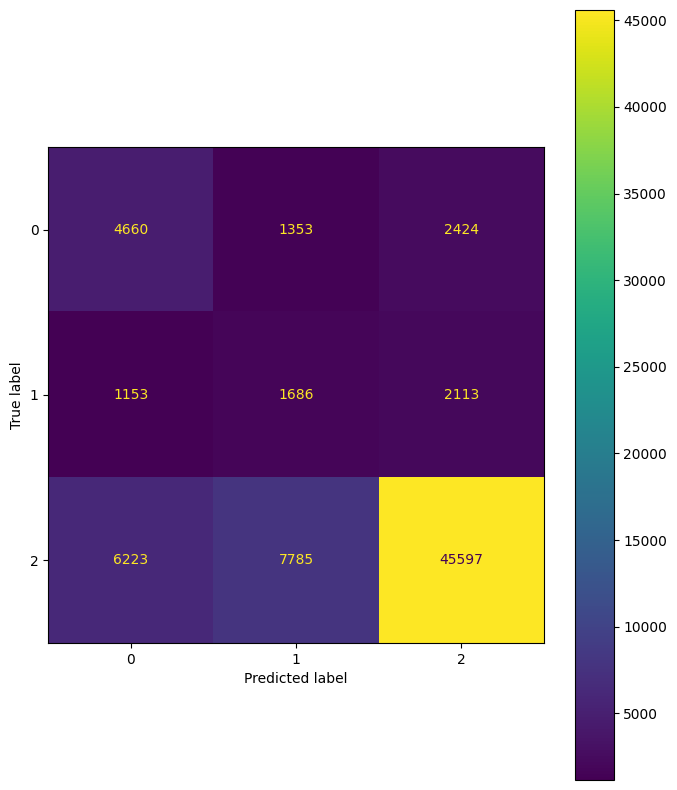

In [ ]:
# Display confusion matrix
cm_rf = confusion_matrix(y_test, y_pred_rf, labels=grid_rf.classes_)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=grid_rf.classes_)
disp_rf.plot()
plt.show()

## Logistic Regression

In [ ]:
# View classification report
y_pred_lg = grid_lg.predict(X_test)

print(classification_report(y_test, y_pred_lg, target_names=['negative', 'neutral', 'positive']))

              precision    recall  f1-score   support

    negative       0.52      0.70      0.60      8437
     neutral       0.19      0.58      0.28      4952
    positive       0.97      0.75      0.85     59605

    accuracy                           0.74     72994
   macro avg       0.56      0.68      0.58     72994
weighted avg       0.86      0.74      0.78     72994



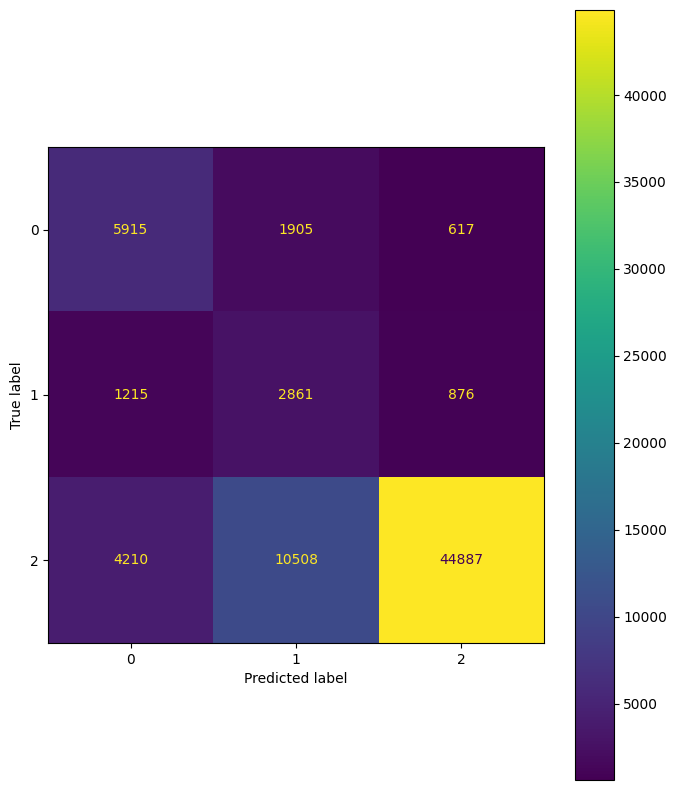

In [ ]:
# Display confusion matrix
cm_lg = confusion_matrix(y_test, y_pred_lg, labels=grid_lg.classes_)
disp_lg = ConfusionMatrixDisplay(confusion_matrix=cm_lg, display_labels=grid_lg.classes_)
disp_lg.plot()
plt.show()